Uvoz biblioteka

In [283]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, classification_report
import shap
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from matplotlib.ticker import ScalarFormatter
import scipy.stats as stats
from sklearn.inspection import permutation_importance


import warnings
warnings.filterwarnings('ignore')

Učitavanje podataka

In [284]:
df = pd.read_csv(r'fortune1000_2024.csv')
print('Dimenzije podatkovnog skupa:' + str(df.shape))
df.head()

Dimenzije podatkovnog skupa:(1000, 32)


,Rank,Company,Ticker,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,...,Assets_M,CEO,Country,HeadquartersCity,HeadquartersState,Website,CompanyType,Footnote,MarketCap_Updated_M,Updated
0,1,Walmart,WMT,Retailing,General Merchandisers,yes,no,no,no,0.0,...,252399.0,C. Douglas McMillon,U.S.,Bentonville,Arkansas,https://www.stock.walmart.com,Public,"Figures are for fiscal year ended Jan. 31, 202...",559911.0,2024-08-05
1,2,Amazon,AMZN,Retailing,Internet Services and Retailing,yes,no,no,no,0.0,...,527854.0,Andrew R. Jassy,U.S.,Seattle,Washington,https://www.amazon.com,Public,"Market value as of July 15, 2024.",2005565.0,2024-08-05
2,3,Apple,AAPL,Technology,"Computers, Office Equipment",yes,no,no,no,1.0,...,352583.0,Timothy D. Cook,U.S.,Cupertino,California,https://www.apple.com,Public,"Figures are for fiscal year ended Sept. 30, 20...",3594309.0,2024-08-05
3,4,UnitedHealth Group,UNH,Health Care,Health Care: Insurance and Managed Care,yes,no,no,yes,1.0,...,273720.0,Andrew P. Witty,U.S.,Minnetonka,Minnesota,https://www.unitedhealthgroup.com,Public,"Market value as of July 15, 2024.",474339.0,2024-08-05
4,5,Berkshire Hathaway,BRKA,Financials,Insurance: Property and Casualty (Stock),yes,no,no,yes,2.0,...,1069978.0,Warren E. Buffett,U.S.,Omaha,Nebraska,https://www.berkshirehathaway.com,Public,"Market value as of July 15, 2024.",937028.0,2024-08-05


In [285]:
#učitavamo podatke za 2023
fortune1000_2023 = pd.read_csv(r'fortune1000_2023.csv')
print(f'Format podataka: {fortune1000_2023.shape}\n')
fortune1000_2023.info()

Format podataka: (1000, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        1000 non-null   int64  
 1   Company                     1000 non-null   object 
 2   Ticker                      959 non-null    object 
 3   Sector                      1000 non-null   object 
 4   Industry                    1000 non-null   object 
 5   Profitable                  1000 non-null   object 
 6   Founder_is_CEO              1000 non-null   object 
 7   FemaleCEO                   1000 non-null   object 
 8   Growth_in_Jobs              993 non-null    object 
 9   Change_in_Rank              929 non-null    float64
 10  Gained_in_Rank              929 non-null    object 
 11  Dropped_in_Rank             929 non-null    object 
 12  Newcomer_to_the_Fortune500  500 non-null    object 
 13  Globa

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1000 non-null   int64  
 1   Company                        1000 non-null   object 
 2   Ticker                         959 non-null    object 
 3   Sector                         1000 non-null   object 
 4   Industry                       1000 non-null   object 
 5   Profitable                     1000 non-null   object 
 6   Founder_is_CEO                 1000 non-null   object 
 7   FemaleCEO                      1000 non-null   object 
 8   Growth_in_Jobs                 1000 non-null   object 
 9   Change_in_Rank                 1000 non-null   float64
 10  Gained_in_Rank                 1000 non-null   object 
 11  Dropped_in_Rank                1000 non-null   object 
 12  Newcomer_to_the_Fortune500     500 non-null    ob

In [287]:
df.describe()

,Rank,Change_in_Rank,Number_of_employees,MarketCap_March28_M,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,MarketCap_Updated_M
count,1000.000000,1000.00000,1.000000e+03,9.590000e+02,1000.000000,994.000000,998.000000,850.000000,1.000000e+03,9.630000e+02
mean,500.498000,5.83800,3.661176e+04,5.083890e+04,20965.064200,6.788129,1867.165832,3.348706,6.375722e+04,5.397445e+04
std,288.819686,66.88084,9.990100e+04,1.913577e+05,48589.311028,34.918519,6649.887738,938.609539,2.721551e+05,2.292664e+05
min,1.000000,-577.00000,2.800000e+01,1.200000e+00,2489.000000,-78.300000,-10298.000000,-22340.000000,3.613000e+02,1.000000e+00
25%,250.750000,-14.00000,6.718000e+03,4.862750e+03,3968.375000,-4.700000,157.575000,-37.575000,5.342950e+03,4.832500e+03
50%,500.500000,4.00000,1.400000e+04,1.253230e+04,7090.500000,4.500000,542.600000,-4.150000,1.284765e+04,1.237900e+04
75%,750.250000,30.25000,3.074075e+04,3.892385e+04,16207.650000,12.300000,1401.050000,22.900000,3.758012e+04,3.773550e+04
max,1000.000000,420.00000,2.100000e+06,3.126133e+06,648125.000000,751.600000,96995.000000,11552.100000,4.325437e+06,3.594309e+06


**EDA**

**Redukcija značajki** 

In [288]:
# odbacujemo varijable koje znamo da nam neće trebati
data_2024_red = df.copy()
data_2024_red = df.drop(['Ticker', 'CEO', 'Country', 'Website', 'Footnote', 'Updated', 'Newcomer_to_the_Fortune500'], axis=1)
data_2024_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           1000 non-null   int64  
 1   Company                        1000 non-null   object 
 2   Sector                         1000 non-null   object 
 3   Industry                       1000 non-null   object 
 4   Profitable                     1000 non-null   object 
 5   Founder_is_CEO                 1000 non-null   object 
 6   FemaleCEO                      1000 non-null   object 
 7   Growth_in_Jobs                 1000 non-null   object 
 8   Change_in_Rank                 1000 non-null   float64
 9   Gained_in_Rank                 1000 non-null   object 
 10  Dropped_in_Rank                1000 non-null   object 
 11  Global500                      1000 non-null   object 
 12  Worlds_Most_Admired_Companies  1000 non-null   ob

**Čišćenje podataka**

Duplikati

In [289]:
# provjeravamo ima li duplikata
duplicates = data_2024_red.duplicated()
print(f'Number of duplicate rows: {duplicates.sum()}')


Number of duplicate rows: 0


Null vrijednosti

In [290]:
data_2024_red.isnull().sum()

Rank                               0
Company                            0
Sector                             0
Industry                           0
Profitable                         0
Founder_is_CEO                     0
FemaleCEO                          0
Growth_in_Jobs                     0
Change_in_Rank                     0
Gained_in_Rank                     0
Dropped_in_Rank                    0
Global500                          0
Worlds_Most_Admired_Companies      0
Best_Companies_to_Work_For         0
Number_of_employees                0
MarketCap_March28_M               41
Revenues_M                         0
RevenuePercentChange               6
Profits_M                          2
ProfitsPercentChange             150
Assets_M                           0
HeadquartersCity                   0
HeadquartersState                  0
CompanyType                        0
MarketCap_Updated_M               37
dtype: int64

Značajke koje sadržavaju null vrijednosti su: MarketCap_March28_M (41), RevenuePercentChange (6), Profits_M (2), ProfitsPercentChange (150) i MarketCap_Updated_M (37). 

In [291]:
# MarketCap_March28_M
null_in_both_MarketCap = data_2024_red['MarketCap_March28_M'].isnull() | data_2024_red['MarketCap_Updated_M'].isnull()

data_2024_red['MarketCap_M'] = data_2024_red.MarketCap_March28_M
data_2024_red['MarketCap_M'] = data_2024_red['MarketCap_M'].fillna(data_2024_red['MarketCap_Updated_M'])

data_2024_red.isnull().sum()

Rank                               0
Company                            0
Sector                             0
Industry                           0
Profitable                         0
Founder_is_CEO                     0
FemaleCEO                          0
Growth_in_Jobs                     0
Change_in_Rank                     0
Gained_in_Rank                     0
Dropped_in_Rank                    0
Global500                          0
Worlds_Most_Admired_Companies      0
Best_Companies_to_Work_For         0
Number_of_employees                0
MarketCap_March28_M               41
Revenues_M                         0
RevenuePercentChange               6
Profits_M                          2
ProfitsPercentChange             150
Assets_M                           0
HeadquartersCity                   0
HeadquartersState                  0
CompanyType                        0
MarketCap_Updated_M               37
MarketCap_M                       37
dtype: int64

In [292]:
data_2024_red = data_2024_red.drop(columns = ['MarketCap_March28_M', 'MarketCap_Updated_M'])
data_2024_red.columns


Index(['Rank', 'Company', 'Sector', 'Industry', 'Profitable', 'Founder_is_CEO',
       'FemaleCEO', 'Growth_in_Jobs', 'Change_in_Rank', 'Gained_in_Rank',
       'Dropped_in_Rank', 'Global500', 'Worlds_Most_Admired_Companies',
       'Best_Companies_to_Work_For', 'Number_of_employees', 'Revenues_M',
       'RevenuePercentChange', 'Profits_M', 'ProfitsPercentChange', 'Assets_M',
       'HeadquartersCity', 'HeadquartersState', 'CompanyType', 'MarketCap_M'],
      dtype='object')

In [293]:
print(data_2024_red[data_2024_red['MarketCap_M'].isna()])

     Rank                              Company                      Sector  \
38     39                 State Farm Insurance                  Financials   
71     72                 Publix Super Markets          Food & Drug Stores   
74     75                           Nationwide                  Financials   
77     78              New York Life Insurance                  Financials   
86     87       Liberty Mutual Insurance Group                  Financials   
95     96                                 TIAA                  Financials   
96     97                                  CHS   Food, Beverages & Tobacco   
101   102  Massachusetts Mutual Life Insurance                  Financials   
102   103                                 USAA                  Financials   
109   110                  Northwestern Mutual                  Financials   
238   239                   Peter Kiewit Sons'  Engineering & Construction   
242   243      American Family Insurance Group                  

In [294]:
data_2024_red[(data_2024_red["MarketCap_M"].isnull()) & (data_2024_red["CompanyType"] == "Private")]

,Rank,Company,Sector,Industry,Profitable,Founder_is_CEO,FemaleCEO,Growth_in_Jobs,Change_in_Rank,Gained_in_Rank,...,Number_of_employees,Revenues_M,RevenuePercentChange,Profits_M,ProfitsPercentChange,Assets_M,HeadquartersCity,HeadquartersState,CompanyType,MarketCap_M
38,39,State Farm Insurance,Financials,Insurance: Property and Casualty (Mutual),no,no,no,yes,5.0,yes,...,65054,104198.6,16.6,-6272.3,NaN,339484.7,Bloomington,Illinois,Private,NaN
71,72,Publix Super Markets,Food & Drug Stores,Food & Drug Stores,yes,no,no,yes,6.0,yes,...,253000,57534.0,4.7,4349.0,49.0,34384.0,Lakeland,Florida,Private,NaN
74,75,Nationwide,Financials,Insurance: Property and Casualty (Mutual),no,no,no,no,8.0,yes,...,24118,54609.4,6.1,-45.2,-104.6,290615.0,Columbus,Ohio,Private,NaN
77,78,New York Life Insurance,Financials,"Insurance: Life, Health (Mutual)",yes,no,no,yes,-7.0,no,...,15384,54317.2,-7.1,804.6,NaN,408904.9,New York,New York,Private,NaN
86,87,Liberty Mutual Insurance Group,Financials,Insurance: Property and Casualty (Stock),yes,no,no,no,-1.0,no,...,45000,52612.0,5.3,213.0,-48.6,165208.0,Boston,Massachusetts,Private,NaN
95,96,TIAA,Financials,"Insurance: Life, Health (Mutual)",no,no,yes,no,7.0,yes,...,16023,45734.8,11.8,-1408.9,-385.4,629369.9,New York,New York,Private,NaN
96,97,CHS,"Food, Beverages & Tobacco",Food Production,yes,no,no,yes,-7.0,no,...,10609,45590.0,-4.6,1900.4,13.2,18957.4,Inver Grove Heights,Minnesota,Private,NaN
101,102,Massachusetts Mutual Life Insurance,Financials,"Insurance: Life, Health (Mutual)",no,no,no,yes,2.0,yes,...,11323,42641.4,5.9,-771.6,-152.0,397895.0,Springfield,Massachusetts,Private,NaN
102,103,USAA,Financials,Insurance: Property and Casualty (Stock),yes,no,no,yes,11.0,yes,...,37376,42493.4,17.1,1213.5,NaN,211637.6,San Antonio,Texas,Private,NaN
109,110,Northwestern Mutual,Financials,"Insurance: Life, Health (Mutual)",yes,no,no,no,1.0,yes,...,8239,38788.1,5.1,711.4,-22.0,358828.6,Milwaukee,Wisconsin,Private,NaN


Nedostajuće vrijednosti u stupcu Marketcap znače da je poduzeće privatno te nisu dostupni podaci. Za takve null vrijednosti koristit ćemo KNN imputer, gdje će model izračunati tržišnu vrijednost na mjestima gdje nedostaje na temelju n najbližih susjeda prema drugim kriterijima.

In [295]:
#korištenje KNN imputera za popunjavanje nedostajućih vrednosti
imputer = KNNImputer(n_neighbors=5)  
data_2024_red[['MarketCap_M']] = imputer.fit_transform(data_2024_red[['MarketCap_M']])

In [296]:
data_2024_red.isnull().sum()

Rank                               0
Company                            0
Sector                             0
Industry                           0
Profitable                         0
Founder_is_CEO                     0
FemaleCEO                          0
Growth_in_Jobs                     0
Change_in_Rank                     0
Gained_in_Rank                     0
Dropped_in_Rank                    0
Global500                          0
Worlds_Most_Admired_Companies      0
Best_Companies_to_Work_For         0
Number_of_employees                0
Revenues_M                         0
RevenuePercentChange               6
Profits_M                          2
ProfitsPercentChange             150
Assets_M                           0
HeadquartersCity                   0
HeadquartersState                  0
CompanyType                        0
MarketCap_M                        0
dtype: int64

In [297]:
print(data_2024_red[data_2024_red['ProfitsPercentChange'].isna()])

     Rank                       Company                  Sector  \
1       2                        Amazon               Retailing   
4       5            Berkshire Hathaway              Financials   
13     14               Cardinal Health             Health Care   
16     17                    Ford Motor  Motor Vehicles & Parts   
31     32                          AT&T      Telecommunications   
..    ...                           ...                     ...   
986   987          Carpenter Technology               Materials   
989   990               AGNC Investment              Financials   
993   994                Mativ Holdings               Chemicals   
997   998                Exact Sciences             Health Care   
999  1000  Clear Channel Outdoor Hldgs.       Business Services   

                                     Industry Profitable Founder_is_CEO  \
1             Internet Services and Retailing        yes             no   
4    Insurance: Property and Casualty (Stock)

Za značajke RevenuePercentChange i ProfitPercentChange pokušat ćemo naći prošlogodišnje vrijednosti za Revenue i Profit te izračunati relativne promjene kako bi reducirali null vrijednosti. Vidimo da za ProfitPercentChange fale podaci čak i u top 10 poduzeća, a to su nam važni podaci.

In [298]:
new_fortune = fortune1000_2023[['Company', 'Profits_M', 'Revenues_M']].copy()
new_fortune.rename(columns={'Profits_M': 'Profits2023_M', 'Revenues_M': 'Revenues2023_M'}, inplace=True)

new_fortune.head()
data_2024_red = pd.merge(data_2024_red, new_fortune, on='Company', how = 'left')

#računamo ProfitsPercentChange i RevenuePercentChange na temelju prošlogodišnjih značajki Profit i Revenue
data_2024_red['ProfitsPercentChange'] = data_2024_red['ProfitsPercentChange'].fillna(((data_2024_red['Profits_M']-data_2024_red['Profits2023_M'])/abs(data_2024_red['Profits2023_M']))*100.00)
data_2024_red['RevenuePercentChange'] = data_2024_red['RevenuePercentChange'].fillna(((data_2024_red['Revenues_M']-data_2024_red['Revenues2023_M'])/abs(data_2024_red['Revenues2023_M']))*100.00)


In [299]:
data_2024_red.isnull().sum()

Rank                              0
Company                           0
Sector                            0
Industry                          0
Profitable                        0
Founder_is_CEO                    0
FemaleCEO                         0
Growth_in_Jobs                    0
Change_in_Rank                    0
Gained_in_Rank                    0
Dropped_in_Rank                   0
Global500                         0
Worlds_Most_Admired_Companies     0
Best_Companies_to_Work_For        0
Number_of_employees               0
Revenues_M                        0
RevenuePercentChange              5
Profits_M                         2
ProfitsPercentChange             25
Assets_M                          0
HeadquartersCity                  0
HeadquartersState                 0
CompanyType                       0
MarketCap_M                       0
Profits2023_M                    78
Revenues2023_M                   78
dtype: int64

In [300]:
# vise nam ne trebaju značajke Profits2023_M i Revenue2023_M pa ih izbacujemo iz skupa
data_2024_red = data_2024_red.drop(['Profits2023_M', 'Revenues2023_M'], axis=1)
data_2024_red.isnull().sum()

Rank                              0
Company                           0
Sector                            0
Industry                          0
Profitable                        0
Founder_is_CEO                    0
FemaleCEO                         0
Growth_in_Jobs                    0
Change_in_Rank                    0
Gained_in_Rank                    0
Dropped_in_Rank                   0
Global500                         0
Worlds_Most_Admired_Companies     0
Best_Companies_to_Work_For        0
Number_of_employees               0
Revenues_M                        0
RevenuePercentChange              5
Profits_M                         2
ProfitsPercentChange             25
Assets_M                          0
HeadquartersCity                  0
HeadquartersState                 0
CompanyType                       0
MarketCap_M                       0
dtype: int64

In [301]:
print(data_2024_red[data_2024_red['Profits_M'].isna() | 
                    data_2024_red['RevenuePercentChange'].isna() | 
                    data_2024_red['ProfitsPercentChange'].isna()])

     Rank                       Company                         Sector  \
205   206    GE HealthCare Technologies                    Health Care   
261   262                  Markel Group                     Financials   
389   390                          Ebay                     Technology   
435   436  BrightSpring Health Services                    Health Care   
680   681                 Agilon Health                    Health Care   
691   692             Rivian Automotive         Motor Vehicles & Parts   
722   723                    NCR Atleos              Business Services   
723   724                       Calumet                         Energy   
732   733                   Hyster-Yale                    Industrials   
778   779               Diebold Nixdorf                     Technology   
797   798                    DraftKings  Hotels, Restaurants & Leisure   
828   829                 CNX Resources                         Energy   
882   883                   CrowdStrik

In [302]:
# izbacit cemo retke gdje je znacajka Profits_M jednaka null vrijednosti 
data_2024_red = data_2024_red.dropna(subset=['Profits_M'])

# za retke RevenuePercentChange i ProfitPercentChange cemo null vrijednosti zamijeniti nulama te pretpostaviti da nema promjena u tim poduzecima
data_2024_red['RevenuePercentChange'] = data_2024_red['RevenuePercentChange'].fillna(0)
data_2024_red['ProfitsPercentChange'] = data_2024_red['ProfitsPercentChange'].fillna(0)

Podaci za 2023.

In [303]:
# odbacujemo varijable koje znamo da nam neće trebati
fortune1000_2023 = fortune1000_2023.drop(['Ticker', 'CEO', 'Country', 'Website', 'Footnote', 'Updated', 'Newcomer_to_the_Fortune500'], axis=1)
fortune1000_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  1000 non-null   int64  
 1   Company               1000 non-null   object 
 2   Sector                1000 non-null   object 
 3   Industry              1000 non-null   object 
 4   Profitable            1000 non-null   object 
 5   Founder_is_CEO        1000 non-null   object 
 6   FemaleCEO             1000 non-null   object 
 7   Growth_in_Jobs        993 non-null    object 
 8   Change_in_Rank        929 non-null    float64
 9   Gained_in_Rank        929 non-null    object 
 10  Dropped_in_Rank       929 non-null    object 
 11  Global500             1000 non-null   object 
 12  Best_Companies        1000 non-null   object 
 13  Number_of_employees   1000 non-null   int64  
 14  MarketCap_March31_M   959 non-null    float64
 15  Revenues_M            

Ponavljamo isti proces kao za 2024. godinu

In [304]:
# provjeravamo ima li duplikata
duplicates = fortune1000_2023.duplicated()
print(f'Number of duplicate rows: {duplicates.sum()}')

Number of duplicate rows: 0


In [305]:
fortune1000_2023.isnull().sum()

Rank                      0
Company                   0
Sector                    0
Industry                  0
Profitable                0
Founder_is_CEO            0
FemaleCEO                 0
Growth_in_Jobs            7
Change_in_Rank           71
Gained_in_Rank           71
Dropped_in_Rank          71
Global500                 0
Best_Companies            0
Number_of_employees       0
MarketCap_March31_M      41
Revenues_M                0
RevenuePercentChange      9
Profits_M                 0
ProfitsPercentChange    134
Assets_M                  0
HeadquartersCity          0
HeadquartersState         0
CompanyType               0
MarketCap_Updated_M      35
dtype: int64

In [306]:
null_in_both_MarketCap = fortune1000_2023['MarketCap_March31_M'].isnull() | fortune1000_2023['MarketCap_Updated_M'].isnull()

fortune1000_2023['MarketCap_M'] = fortune1000_2023.MarketCap_March31_M
fortune1000_2023['MarketCap_M'] = fortune1000_2023['MarketCap_M'].fillna(fortune1000_2023['MarketCap_Updated_M'])

fortune1000_2023.isnull().sum()

Rank                      0
Company                   0
Sector                    0
Industry                  0
Profitable                0
Founder_is_CEO            0
FemaleCEO                 0
Growth_in_Jobs            7
Change_in_Rank           71
Gained_in_Rank           71
Dropped_in_Rank          71
Global500                 0
Best_Companies            0
Number_of_employees       0
MarketCap_March31_M      41
Revenues_M                0
RevenuePercentChange      9
Profits_M                 0
ProfitsPercentChange    134
Assets_M                  0
HeadquartersCity          0
HeadquartersState         0
CompanyType               0
MarketCap_Updated_M      35
MarketCap_M              35
dtype: int64

In [307]:
fortune1000_2023 = fortune1000_2023.drop(columns = ['MarketCap_March31_M', 'MarketCap_Updated_M'])
fortune1000_2023.columns

Index(['Rank', 'Company', 'Sector', 'Industry', 'Profitable', 'Founder_is_CEO',
       'FemaleCEO', 'Growth_in_Jobs', 'Change_in_Rank', 'Gained_in_Rank',
       'Dropped_in_Rank', 'Global500', 'Best_Companies', 'Number_of_employees',
       'Revenues_M', 'RevenuePercentChange', 'Profits_M',
       'ProfitsPercentChange', 'Assets_M', 'HeadquartersCity',
       'HeadquartersState', 'CompanyType', 'MarketCap_M'],
      dtype='object')

In [308]:
print(fortune1000_2023[fortune1000_2023['MarketCap_M'].isna()])

     Rank                              Company                      Sector  \
43     44                 State Farm Insurance                  Financials   
70     71              New York Life Insurance                  Financials   
77     78                 Publix Super Markets          Food & Drug Stores   
82     83                           Nationwide                  Financials   
85     86       Liberty Mutual Insurance Group                  Financials   
89     90                                  CHS   Food, Beverages & Tobacco   
102   103                                 TIAA                  Financials   
103   104  Massachusetts Mutual Life Insurance                  Financials   
110   111                  Northwestern Mutual                  Financials   
113   114                                 USAA                  Financials   
212   213                         Land O'Lakes   Food, Beverages & Tobacco   
280   281    Guardian Life Ins. Co. of America                  

In [309]:
# korištenje KNN imputera za popunjavanje nedostajućih vrednosti
imputer = KNNImputer(n_neighbors=5)  
fortune1000_2023[['MarketCap_M']] = imputer.fit_transform(fortune1000_2023[['MarketCap_M']])

In [310]:
fortune1000_2023.isnull().sum()

Rank                      0
Company                   0
Sector                    0
Industry                  0
Profitable                0
Founder_is_CEO            0
FemaleCEO                 0
Growth_in_Jobs            7
Change_in_Rank           71
Gained_in_Rank           71
Dropped_in_Rank          71
Global500                 0
Best_Companies            0
Number_of_employees       0
Revenues_M                0
RevenuePercentChange      9
Profits_M                 0
ProfitsPercentChange    134
Assets_M                  0
HeadquartersCity          0
HeadquartersState         0
CompanyType               0
MarketCap_M               0
dtype: int64

In [311]:
# treba nam i skup iz 2022. godine za izračun postotnih promjena
fortune1000_2022 =pd.read_csv('fortune1000_2022.csv')
fortune1000_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

In [312]:
fortune1000_2022_red = fortune1000_2022[['company', 'profit', 'revenue']]
fortune1000_2022_red.rename(columns={'company':'Company','profit': 'Profits2022_M', 'revenue': 'Revenues2022_M'}, inplace=True)

fortune1000_2023 = pd.merge(fortune1000_2023, fortune1000_2022_red, on='Company', how = 'left')

fortune1000_2023['ProfitsPercentChange'] =fortune1000_2023['ProfitsPercentChange'].fillna(((fortune1000_2023['Profits_M']-fortune1000_2023['Profits2022_M'])/abs(fortune1000_2023['Profits2022_M']))*100.00)
fortune1000_2023['RevenuePercentChange'] = fortune1000_2023['RevenuePercentChange'].fillna(((fortune1000_2023['Revenues_M']-fortune1000_2023['Revenues2022_M'])/abs(fortune1000_2023['Revenues2022_M']))*100.00)

In [313]:
fortune1000_2023.isnull().sum()

Rank                     0
Company                  0
Sector                   0
Industry                 0
Profitable               0
Founder_is_CEO           0
FemaleCEO                0
Growth_in_Jobs           7
Change_in_Rank          71
Gained_in_Rank          71
Dropped_in_Rank         71
Global500                0
Best_Companies           0
Number_of_employees      0
Revenues_M               0
RevenuePercentChange     6
Profits_M                0
ProfitsPercentChange    31
Assets_M                 0
HeadquartersCity         0
HeadquartersState        0
CompanyType              0
MarketCap_M              0
Profits2022_M           85
Revenues2022_M          82
dtype: int64

In [314]:
# vise nam ne trebaju značajke Profits2023_M i Revenue2023_M pa ih izbacujemo iz skupa
fortune1000_2023 = fortune1000_2023.drop(['Profits2022_M', 'Revenues2022_M'], axis=1)
fortune1000_2023.isnull().sum()

Rank                     0
Company                  0
Sector                   0
Industry                 0
Profitable               0
Founder_is_CEO           0
FemaleCEO                0
Growth_in_Jobs           7
Change_in_Rank          71
Gained_in_Rank          71
Dropped_in_Rank         71
Global500                0
Best_Companies           0
Number_of_employees      0
Revenues_M               0
RevenuePercentChange     6
Profits_M                0
ProfitsPercentChange    31
Assets_M                 0
HeadquartersCity         0
HeadquartersState        0
CompanyType              0
MarketCap_M              0
dtype: int64

In [315]:
fortune1000_2023['RevenuePercentChange'] = fortune1000_2023['RevenuePercentChange'].fillna(0)
fortune1000_2023['ProfitsPercentChange'] = fortune1000_2023['ProfitsPercentChange'].fillna(0)

In [316]:
fortune1000_2023.isnull().sum()

Rank                     0
Company                  0
Sector                   0
Industry                 0
Profitable               0
Founder_is_CEO           0
FemaleCEO                0
Growth_in_Jobs           7
Change_in_Rank          71
Gained_in_Rank          71
Dropped_in_Rank         71
Global500                0
Best_Companies           0
Number_of_employees      0
Revenues_M               0
RevenuePercentChange     0
Profits_M                0
ProfitsPercentChange     0
Assets_M                 0
HeadquartersCity         0
HeadquartersState        0
CompanyType              0
MarketCap_M              0
dtype: int64

In [317]:
print(fortune1000_2023[fortune1000_2023['Change_in_Rank'].isna() | 
                    fortune1000_2023['Gained_in_Rank'].isna() | 
                    fortune1000_2023['Dropped_in_Rank'].isna()])

     Rank                     Company       Sector  \
116   117            US Foods Holding  Wholesalers   
161   162        Constellation Energy       Energy   
165   166                         CDW   Technology   
194   195                     Coupang    Retailing   
224   225            Kyndryl Holdings   Technology   
..    ...                         ...          ...   
990   991           Excelerate Energy       Energy   
992   993           Cinemark Holdings        Media   
996   997             ProFrac Holding       Energy   
998   999              Teladoc Health  Health Care   
999  1000  Alliance Resource Partners       Energy   

                                     Industry Profitable Founder_is_CEO  \
116             Wholesalers: Food and Grocery        yes             no   
161                                    Energy         no             no   
165           Information Technology Services        yes             no   
194           Internet Services and Retailing      

In [318]:
fortune1000_2022_r = fortune1000_2022[['company', 'rank']]
fortune1000_2022_r.rename(columns={'company':'Company','rank':'Previous_rank'}, inplace=True)

fortune1000_2023 = pd.merge(fortune1000_2023, fortune1000_2022_r, on='Company', how = 'left')


In [319]:
fortune1000_2023.isnull().sum()

Rank                     0
Company                  0
Sector                   0
Industry                 0
Profitable               0
Founder_is_CEO           0
FemaleCEO                0
Growth_in_Jobs           7
Change_in_Rank          71
Gained_in_Rank          71
Dropped_in_Rank         71
Global500                0
Best_Companies           0
Number_of_employees      0
Revenues_M               0
RevenuePercentChange     0
Profits_M                0
ProfitsPercentChange     0
Assets_M                 0
HeadquartersCity         0
HeadquartersState        0
CompanyType              0
MarketCap_M              0
Previous_rank           82
dtype: int64

In [320]:
fortune1000_2023['Change_in_Rank'] = fortune1000_2023['Change_in_Rank'].fillna(fortune1000_2023['Rank'] - fortune1000_2023['Previous_rank'])

In [321]:
fortune1000_2023['Change_in_Rank'].isnull().sum()

60

In [322]:
fortune1000_2023['Gained_in_Rank'] = fortune1000_2023.apply(
    lambda row: 'yes' if row['Change_in_Rank'] > 0 else ('no' if pd.notnull(row['Change_in_Rank']) else None),
    axis=1
)
fortune1000_2023['Dropped_in_Rank'] = fortune1000_2023.apply(
    lambda row: 'yes' if row['Change_in_Rank'] < 0 else ('no' if pd.notnull(row['Change_in_Rank']) else None),
    axis=1
)

# Za slučaj kada je Change_in_Rank == 0
fortune1000_2023.loc[fortune1000_2023['Change_in_Rank'] == 0, ['Gained_in_Rank', 'Dropped_in_Rank']] = 'no'

fortune1000_2023.isnull().sum()

Rank                     0
Company                  0
Sector                   0
Industry                 0
Profitable               0
Founder_is_CEO           0
FemaleCEO                0
Growth_in_Jobs           7
Change_in_Rank          60
Gained_in_Rank          60
Dropped_in_Rank         60
Global500                0
Best_Companies           0
Number_of_employees      0
Revenues_M               0
RevenuePercentChange     0
Profits_M                0
ProfitsPercentChange     0
Assets_M                 0
HeadquartersCity         0
HeadquartersState        0
CompanyType              0
MarketCap_M              0
Previous_rank           82
dtype: int64

In [323]:
fortune1000_2023 = fortune1000_2023.drop(['Previous_rank'],axis=1)

In [324]:
# Funkcija za određivanje Rank_Change
def determine_rank_change(row):
    if row['Gained_in_Rank'] == 'yes':
        return 'Gained_in_Rank'
    elif row['Dropped_in_Rank'] == 'yes':
        return 'Dropped_in_Rank'
    else:
        return 'Same_Rank'

# Primjena funkcije na dataset
fortune1000_2023['Rank_Change'] = fortune1000_2023.apply(determine_rank_change, axis=1)

# Provjera rezultata
print(fortune1000_2023[['Gained_in_Rank', 'Dropped_in_Rank', 'Rank_Change']])

    Gained_in_Rank Dropped_in_Rank      Rank_Change
0               no              no        Same_Rank
1               no              no        Same_Rank
2              yes              no   Gained_in_Rank
3               no             yes  Dropped_in_Rank
4               no              no        Same_Rank
..             ...             ...              ...
995             no             yes  Dropped_in_Rank
996           None            None        Same_Rank
997             no             yes  Dropped_in_Rank
998           None            None        Same_Rank
999           None            None        Same_Rank

[1000 rows x 3 columns]


In [325]:
fortune1000_2023.isnull().sum()

Rank                     0
Company                  0
Sector                   0
Industry                 0
Profitable               0
Founder_is_CEO           0
FemaleCEO                0
Growth_in_Jobs           7
Change_in_Rank          60
Gained_in_Rank          60
Dropped_in_Rank         60
Global500                0
Best_Companies           0
Number_of_employees      0
Revenues_M               0
RevenuePercentChange     0
Profits_M                0
ProfitsPercentChange     0
Assets_M                 0
HeadquartersCity         0
HeadquartersState        0
CompanyType              0
MarketCap_M              0
Rank_Change              0
dtype: int64

In [326]:
fortune1000_2023=fortune1000_2023.dropna()
fortune1000_2023.isnull().sum()

Rank                    0
Company                 0
Sector                  0
Industry                0
Profitable              0
Founder_is_CEO          0
FemaleCEO               0
Growth_in_Jobs          0
Change_in_Rank          0
Gained_in_Rank          0
Dropped_in_Rank         0
Global500               0
Best_Companies          0
Number_of_employees     0
Revenues_M              0
RevenuePercentChange    0
Profits_M               0
ProfitsPercentChange    0
Assets_M                0
HeadquartersCity        0
HeadquartersState       0
CompanyType             0
MarketCap_M             0
Rank_Change             0
dtype: int64

In [327]:
fortune1000_2022_emp = fortune1000_2022[['company', 'num. of employees']]
fortune1000_2022_emp.rename(columns={'company':'Company','num. of employees': 'Previous_number_of_employees'}, inplace=True)

In [328]:
fortune1000_2023 = pd.merge(fortune1000_2023, fortune1000_2022_emp, on='Company', how = 'left' )

In [329]:
fortune1000_2023['EmployeesPercentChange'] = (((fortune1000_2023['Number_of_employees'] - fortune1000_2023['Previous_number_of_employees'])/ fortune1000_2023['Previous_number_of_employees']))*100.00

In [330]:
fortune1000_2023['EmployeesPercentChange'].isnull().sum()

21

In [331]:
fortune1000_2023 = fortune1000_2023.drop(columns=['Previous_number_of_employees'], inplace=False)
fortune1000_2023['EmployeesPercentChange'] = fortune1000_2023['EmployeesPercentChange'].fillna(0)
fortune1000_2023.isnull().sum()

Rank                      0
Company                   0
Sector                    0
Industry                  0
Profitable                0
Founder_is_CEO            0
FemaleCEO                 0
Growth_in_Jobs            0
Change_in_Rank            0
Gained_in_Rank            0
Dropped_in_Rank           0
Global500                 0
Best_Companies            0
Number_of_employees       0
Revenues_M                0
RevenuePercentChange      0
Profits_M                 0
ProfitsPercentChange      0
Assets_M                  0
HeadquartersCity          0
HeadquartersState         0
CompanyType               0
MarketCap_M               0
Rank_Change               0
EmployeesPercentChange    0
dtype: int64

Množimo financijske značajke s tisuću da dobijemo stvarne brojke (u milijardama)

In [332]:
fortune1000_2023['Revenues_M'] = fortune1000_2023['Revenues_M'] * 1000
fortune1000_2023['Profits_M'] = fortune1000_2023['Profits_M'] * 1000
fortune1000_2023['Assets_M'] = fortune1000_2023['Assets_M'] * 1000
fortune1000_2023['MarketCap_M'] = fortune1000_2023['MarketCap_M'] * 1000


In [333]:
fortune1000_2023.rename(columns={'Revenues_M': 'Revenue', 'Profits_M':'Profit', 'Assets_M':'Assets', 'MarketCap_M' : 'MarketCap'}, inplace=True)


In [334]:
fortune1000_2023=fortune1000_2023.drop(columns=['Gained_in_Rank', 'Dropped_in_Rank', 'Change_in_Rank'])

Dodavanje značajki

In [335]:
new_fortune = fortune1000_2023[['Company', 'Number_of_employees']]
new_fortune.rename(columns={'Number_of_employees': 'Previous_number_of_employees'}, inplace=True)


In [336]:
data_2024 = pd.merge(data_2024_red, new_fortune, on='Company', how = 'left' )

In [337]:
data_2024['EmployeesPercentChange'] = (((data_2024['Number_of_employees'] - data_2024['Previous_number_of_employees'])/ data_2024['Previous_number_of_employees']))*100.00

In [338]:
data_2024['EmployeesPercentChange'].isnull().sum()

124

In [339]:
data_2024 = data_2024.drop(columns=['Previous_number_of_employees'], inplace=False)
data_2024['EmployeesPercentChange'] = data_2024['EmployeesPercentChange'].fillna(0)
data_2024.isnull().sum()

Rank                             0
Company                          0
Sector                           0
Industry                         0
Profitable                       0
Founder_is_CEO                   0
FemaleCEO                        0
Growth_in_Jobs                   0
Change_in_Rank                   0
Gained_in_Rank                   0
Dropped_in_Rank                  0
Global500                        0
Worlds_Most_Admired_Companies    0
Best_Companies_to_Work_For       0
Number_of_employees              0
Revenues_M                       0
RevenuePercentChange             0
Profits_M                        0
ProfitsPercentChange             0
Assets_M                         0
HeadquartersCity                 0
HeadquartersState                0
CompanyType                      0
MarketCap_M                      0
EmployeesPercentChange           0
dtype: int64

In [340]:
data_2024['Revenues_M'] = data_2024['Revenues_M'] * 1000
data_2024['Profits_M'] = data_2024['Profits_M'] * 1000
data_2024['Assets_M'] = data_2024['Assets_M'] * 1000
data_2024['MarketCap_M'] = data_2024['MarketCap_M'] * 1000


In [341]:
data_2024.rename(columns={'Revenues_M': 'Revenue', 'Profits_M':'Profit', 'Assets_M':'Assets', 'MarketCap_M' : 'MarketCap'}, inplace=True)


Unpivoting

In [343]:
# Primjena funkcije na dataset
data_2024['Rank_Change'] = data_2024.apply(determine_rank_change, axis=1)

# Provjera rezultata
print(data_2024[['Gained_in_Rank', 'Dropped_in_Rank', 'Rank_Change']])


    Gained_in_Rank Dropped_in_Rank      Rank_Change
0               no              no        Same_Rank
1               no              no        Same_Rank
2              yes              no   Gained_in_Rank
3              yes              no   Gained_in_Rank
4              yes              no   Gained_in_Rank
..             ...             ...              ...
993             no              no        Same_Rank
994             no              no        Same_Rank
995             no              no        Same_Rank
996             no              no        Same_Rank
997             no             yes  Dropped_in_Rank

[998 rows x 3 columns]


In [344]:
data_2024=data_2024.drop(columns=['Gained_in_Rank', 'Dropped_in_Rank'])

In [345]:
data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           998 non-null    int64  
 1   Company                        998 non-null    object 
 2   Sector                         998 non-null    object 
 3   Industry                       998 non-null    object 
 4   Profitable                     998 non-null    object 
 5   Founder_is_CEO                 998 non-null    object 
 6   FemaleCEO                      998 non-null    object 
 7   Growth_in_Jobs                 998 non-null    object 
 8   Change_in_Rank                 998 non-null    float64
 9   Global500                      998 non-null    object 
 10  Worlds_Most_Admired_Companies  998 non-null    object 
 11  Best_Companies_to_Work_For     998 non-null    object 
 12  Number_of_employees            998 non-null    int

In [346]:
print(f'Format za 2023.: {fortune1000_2023.shape}')
print(f'Format za 2024.: {data_2024.shape}')

Format za 2023.: (939, 22)
Format za 2024.: (998, 24)


In [347]:
fortune1000_2023.columns

Index(['Rank', 'Company', 'Sector', 'Industry', 'Profitable', 'Founder_is_CEO',
       'FemaleCEO', 'Growth_in_Jobs', 'Global500', 'Best_Companies',
       'Number_of_employees', 'Revenue', 'RevenuePercentChange', 'Profit',
       'ProfitsPercentChange', 'Assets', 'HeadquartersCity',
       'HeadquartersState', 'CompanyType', 'MarketCap', 'Rank_Change',
       'EmployeesPercentChange'],
      dtype='object')

In [348]:
data_2024.columns

Index(['Rank', 'Company', 'Sector', 'Industry', 'Profitable', 'Founder_is_CEO',
       'FemaleCEO', 'Growth_in_Jobs', 'Change_in_Rank', 'Global500',
       'Worlds_Most_Admired_Companies', 'Best_Companies_to_Work_For',
       'Number_of_employees', 'Revenue', 'RevenuePercentChange', 'Profit',
       'ProfitsPercentChange', 'Assets', 'HeadquartersCity',
       'HeadquartersState', 'CompanyType', 'MarketCap',
       'EmployeesPercentChange', 'Rank_Change'],
      dtype='object')

In [349]:
fortune1000_2023.rename(columns ={'Best_Companies' : 'Best_Companies_to_Work_For'},inplace=True)

In [350]:
print(f'Format za 2023.: {fortune1000_2023.shape}')
print(f'Format za 2024.: {data_2024.shape}')

Format za 2023.: (939, 22)
Format za 2024.: (998, 24)


Učinkovito smo uklonili sve nepostojeće vrijednosti.

*Stršeće vrijednosti*

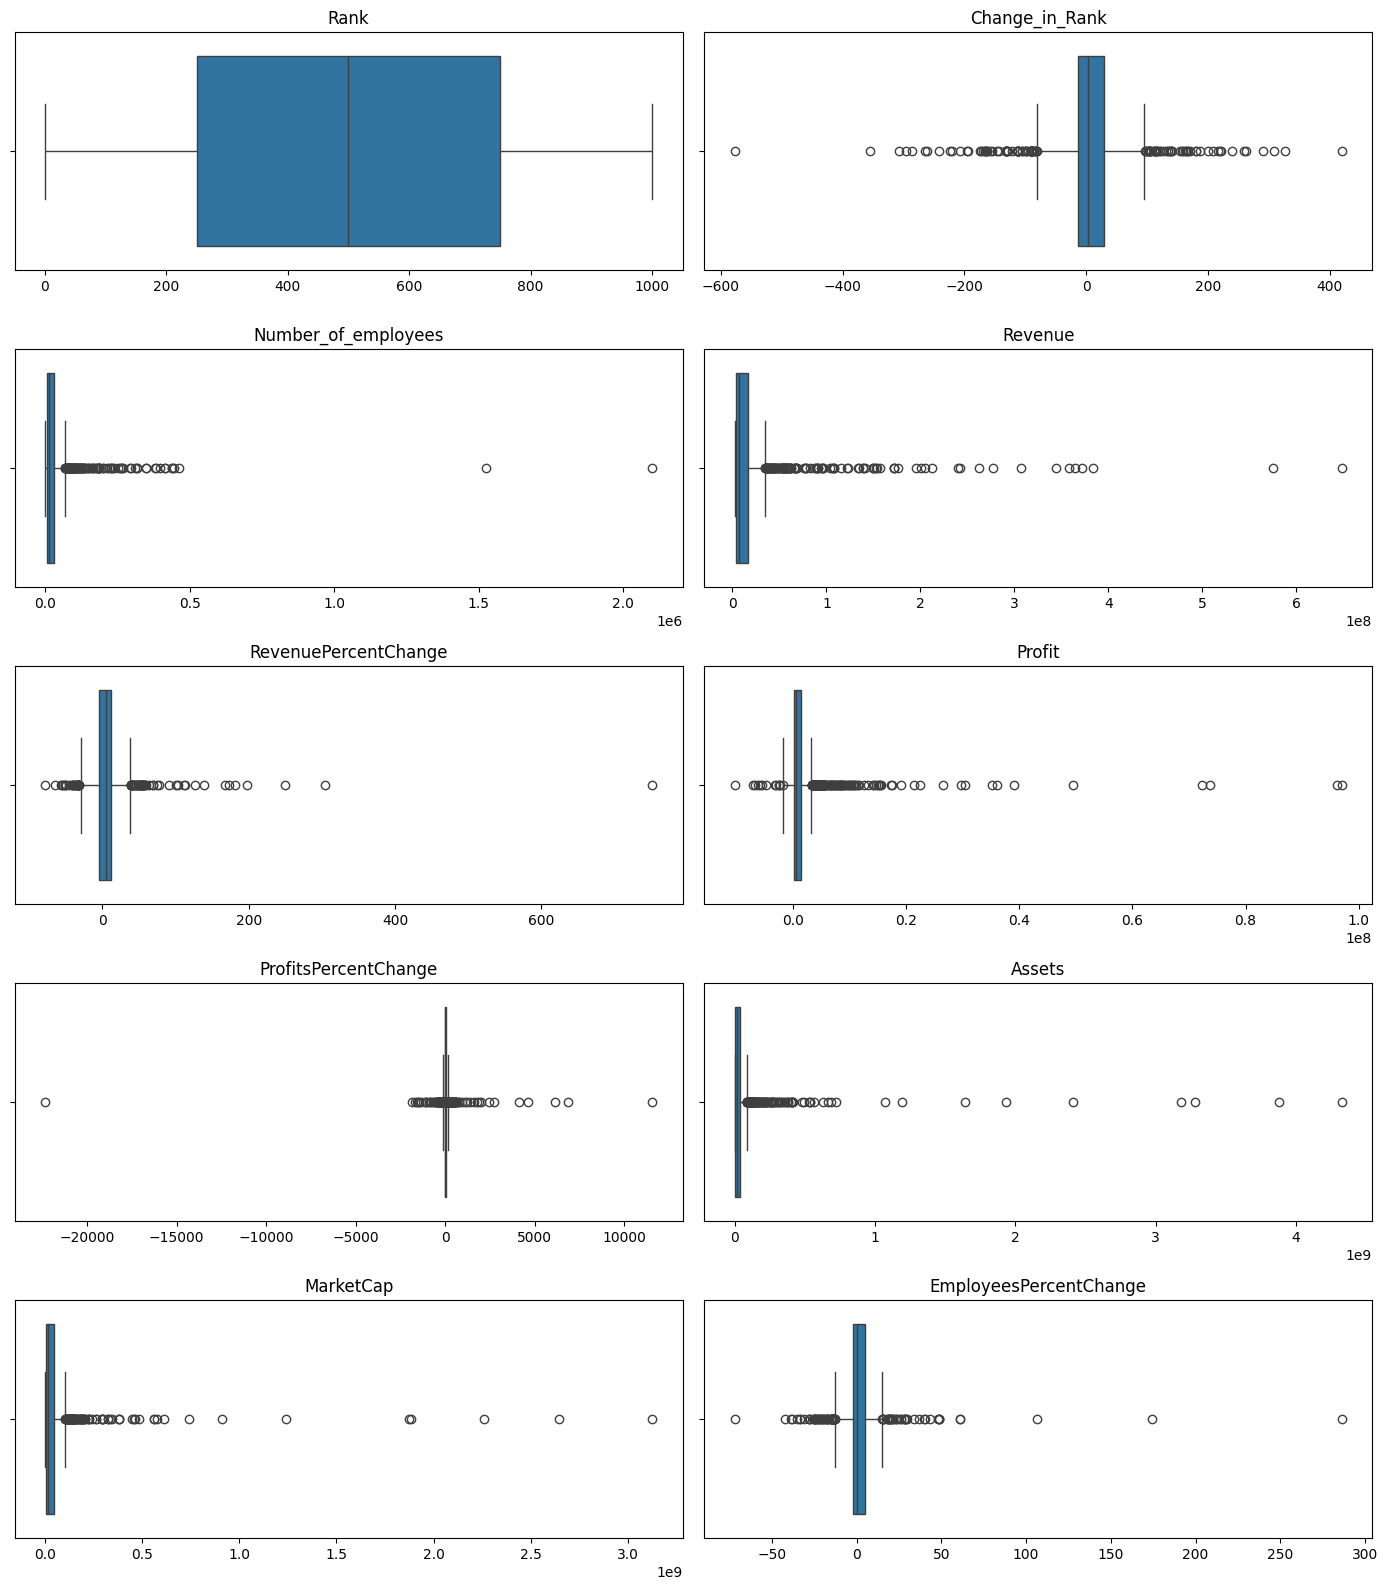

In [351]:

# prikazujemo samo numeričke značajke
numerical_columns = data_2024.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=(len(numerical_columns) + 1) // 2, ncols=2, figsize=(14,16))

for i, col in enumerate(numerical_columns):
    ax = axes[i//2, i%2]  
    sns.boxplot(data=data_2024, x=col, ax=ax)
    ax.set_title(f'{col}')
    ax.set_xlabel('')  
    ax.set_ylabel('') 

for j in range(len(numerical_columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()




Zasad nećemo uklanjati stršeće vrijednosti jer su npr. prihodi koji odskaču od drugih ključni za buduću analizu.

**VIZUALIZACIJA PODATAKA**

*Numeričke značajke*

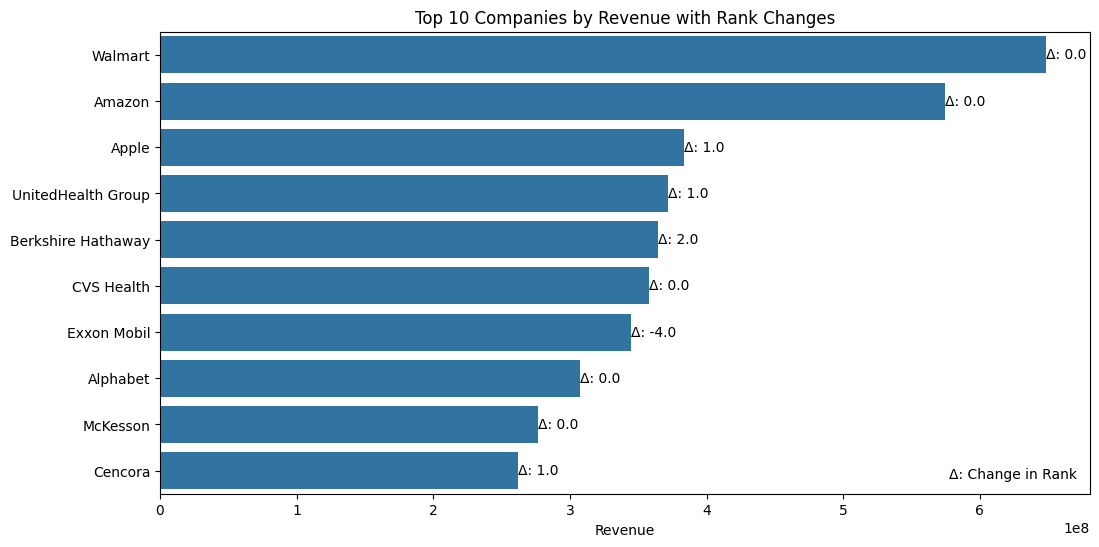

In [352]:
# prikazujemo top 10 poduzeća po prihodima
plt.figure(figsize=(12, 6))

sns.barplot(y='Company', x='Revenue', data=data_2024.head(10))
plt.xlabel('Revenue')
plt.ylabel('')
plt.title('Top 10 Companies by Revenue with Rank Changes')

for index, row in data_2024.head(10).iterrows():
    plt.text(
        row['Revenue'], index,  
        f"Δ: {row['Change_in_Rank']}",  
        va='center', ha='left', color='black'
    )
plt.legend(
    handles=[plt.Line2D([0], [0], color='black', lw=0, marker='', label='Δ: Change in Rank')],
    loc='lower right',  
    frameon=False
)

plt.show()



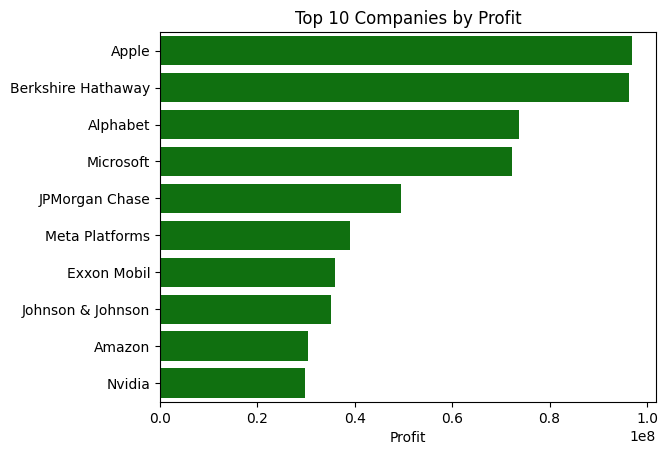

In [353]:
#prikaži top 10 poduzeća po dobiti
sns.barplot(y='Company', x='Profit', data=data_2024.sort_values(by=['Profit'], ascending=False).head(10), color='green').set(title='Top 10 Companies by Profit')
plt.xlabel('Profit')
plt.ylabel('')
plt.show()

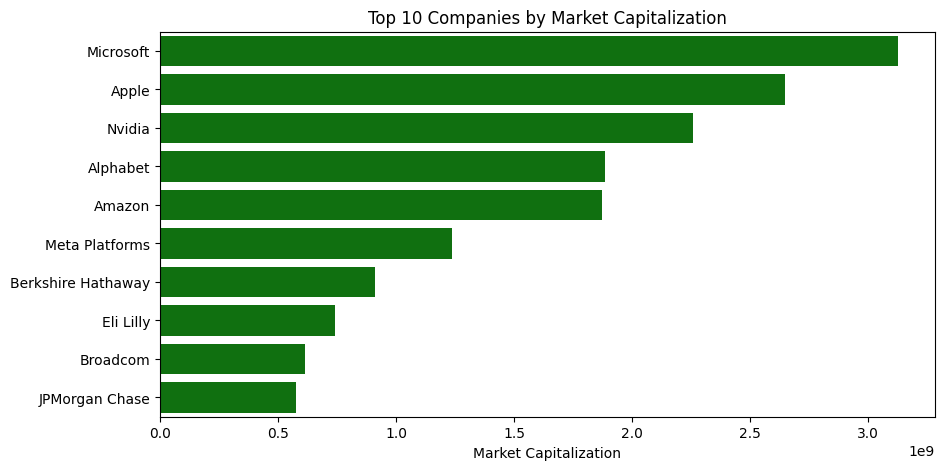

In [354]:
#prikaži top 10 poduzeća po tržišnoj kapitalizaciji
plt.figure(figsize=(10, 5))
sns.barplot(y='Company', x='MarketCap', data=data_2024.sort_values(by=['MarketCap'], ascending=False).head(10), color='green').set(title='Top 10 Companies by Market Capitalization')
plt.xlabel('Market Capitalization')
plt.ylabel('')
plt.show()

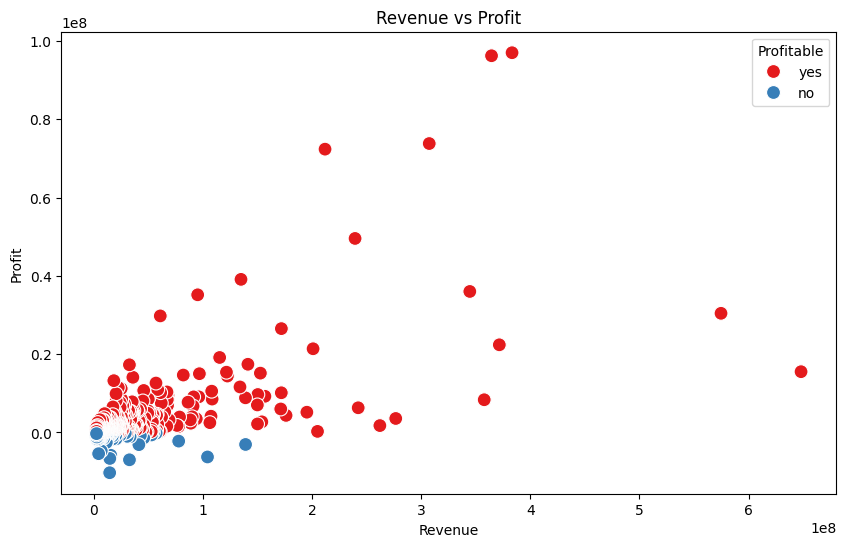

In [355]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenue', y='Profit', hue='Profitable', data=data_2024, palette='Set1', s=100)
plt.title("Revenue vs Profit")
plt.xlabel("Revenue")
plt.ylabel("Profit")
plt.legend(title="Profitable")
plt.show()

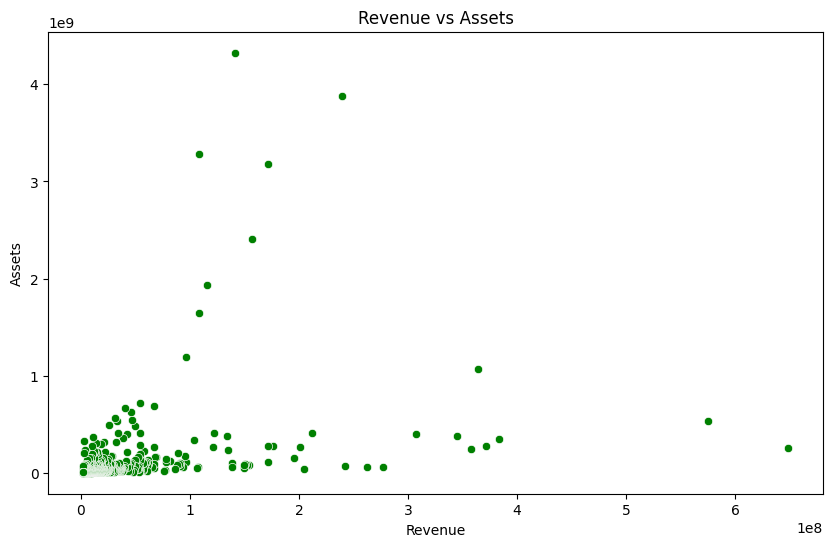

In [356]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Revenue', y='Assets', data=data_2024, color='green')
plt.title('Revenue vs Assets')
plt.xlabel('Revenue')
plt.ylabel('Assets')
plt.show()

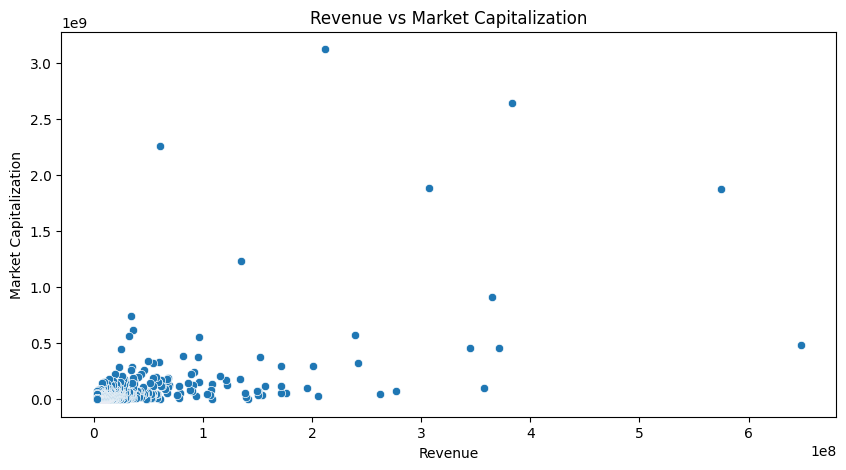

In [357]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Revenue', y='MarketCap', data=data_2024)
plt.title('Revenue vs Market Capitalization')
plt.xlabel('Revenue')
plt.ylabel('Market Capitalization')
plt.show()

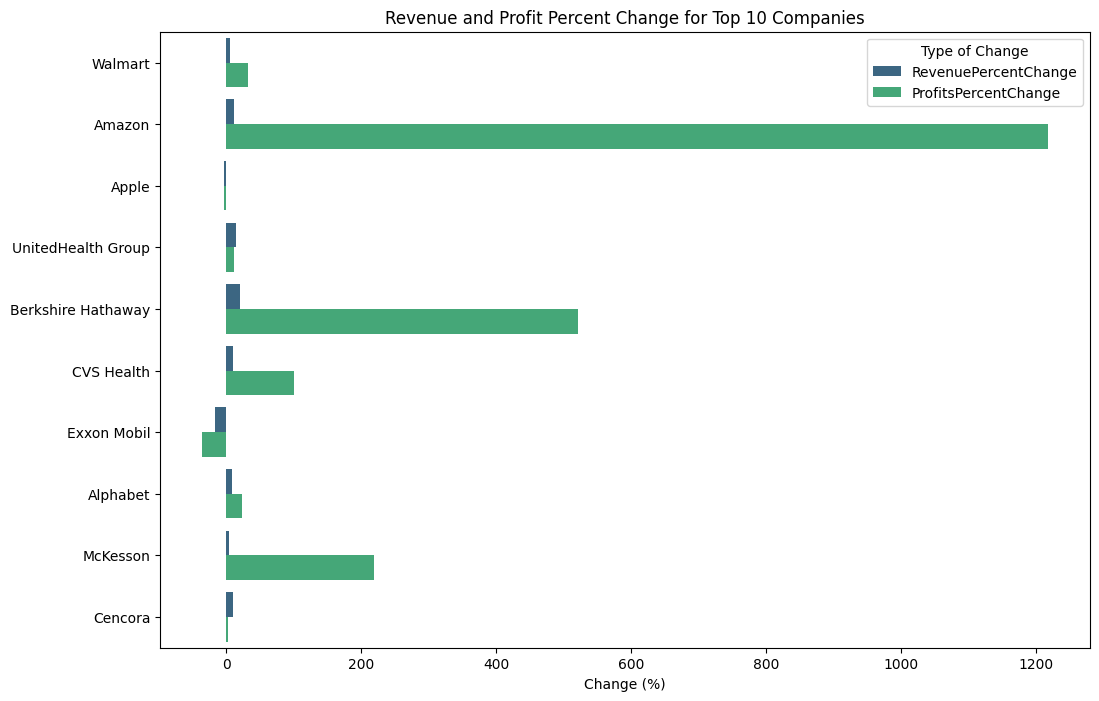

In [358]:
top_10_companies = data_2024.sort_values(by='Rank').head(10)

top_10_melted = top_10_companies[['Company', 'RevenuePercentChange', 'ProfitsPercentChange']].melt(id_vars='Company', value_vars=['RevenuePercentChange', 'ProfitsPercentChange'], var_name='Type of Change', value_name='Percent_Change')

plt.figure(figsize=(12,8))
sns.barplot(x='Percent_Change', y='Company', hue='Type of Change', data=top_10_melted, palette='viridis')

plt.title('Revenue and Profit Percent Change for Top 10 Companies')
plt.xlabel('Change (%)')
plt.ylabel('')

plt.show()

Kategoričke značajke

In [359]:
# razlika ozmeđu sektora i industrije
print(data_2024_red['Sector'].unique())
print(data_2024_red['Industry'].unique())

['Retailing' 'Technology' 'Health Care' 'Financials' 'Energy'
 'Motor Vehicles & Parts' 'Food & Drug Stores' 'Telecommunications'
 'Food, Beverages & Tobacco' 'Transportation' 'Media' 'Household Products'
 'Aerospace & Defense' 'Wholesalers' 'Industrials' 'Apparel' 'Chemicals'
 'Hotels, Restaurants & Leisure' 'Engineering & Construction' 'Materials'
 'Business Services']
['General Merchandisers' 'Internet Services and Retailing'
 'Computers, Office Equipment' 'Health Care: Insurance and Managed Care'
 'Insurance: Property and Casualty (Stock)'
 'Health Care: Pharmacy and Other Services' 'Petroleum Refining'
 'Wholesalers: Health Care' 'Commercial Banks' 'Computer Software'
 'Motor Vehicles & Parts' 'Specialty Retailers: Other'
 'Food & Drug Stores' 'Diversified Financials' 'Telecommunications'
 'Insurance: Property and Casualty (Mutual)' 'Pharmaceuticals'
 'Food Production' 'Food Consumer Products'
 'Mail, Package, and Freight Delivery' 'Entertainment'
 'Household and Personal Products

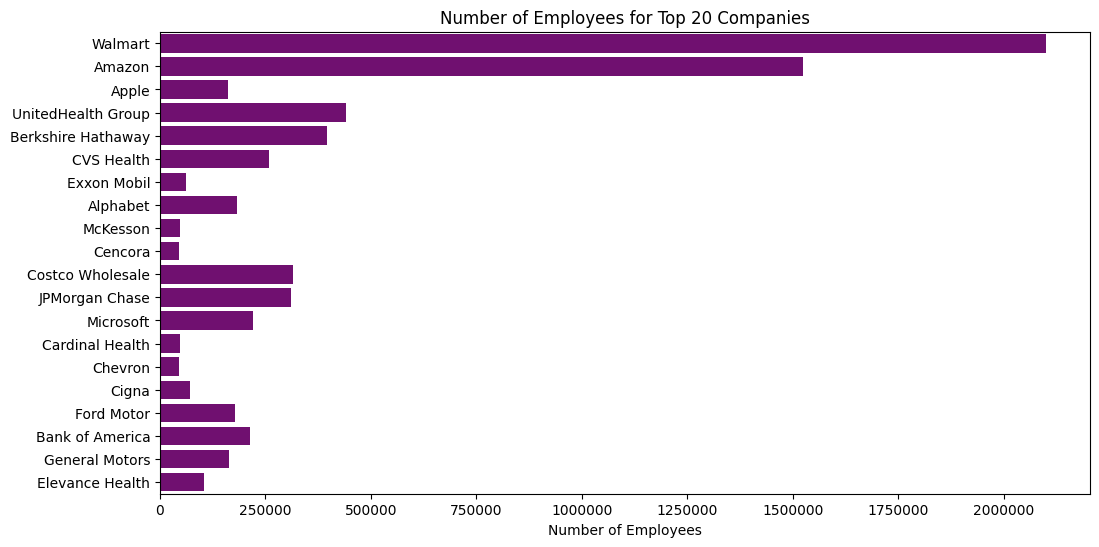

In [360]:
#prikažimo broj zaposlenih u top 10 zaposlenih

plt.figure(figsize=(12, 6))
sns.barplot(x='Number_of_employees', y='Company', data=data_2024.head(20),color='purple')
plt.title('Number of Employees for Top 20 Companies')
plt.xlabel('Number of Employees')
plt.ylabel('')

plt.ticklabel_format(style='plain', axis='x')
plt.show()

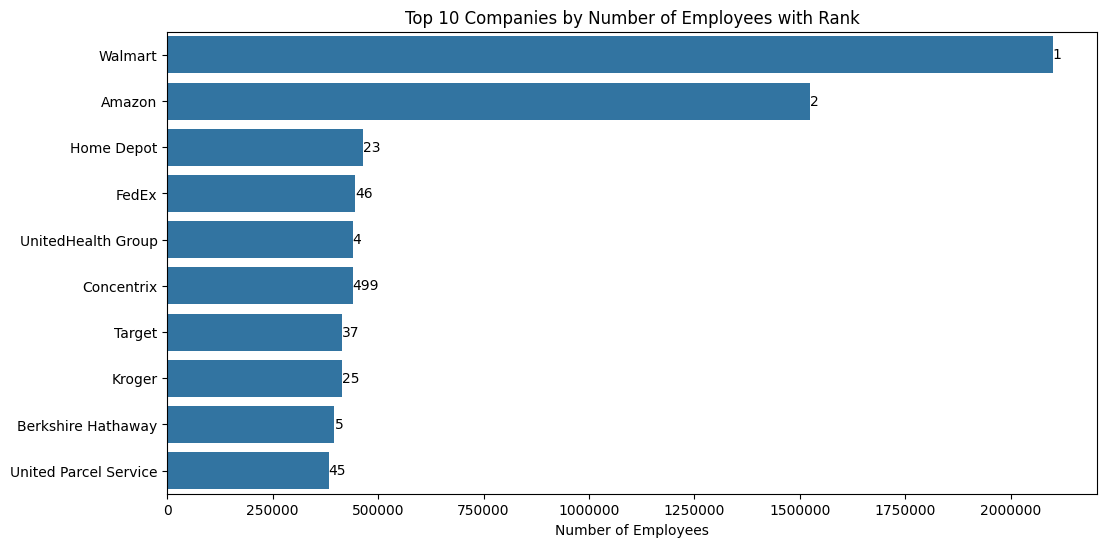

In [361]:
data_2024_red_sorted = data_2024_red.sort_values(by='Number_of_employees', ascending=False)

top_10_companies = data_2024_red_sorted.head(10)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Number_of_employees', y='Company', data=top_10_companies)

for i, (value, rank) in enumerate(zip(top_10_companies['Number_of_employees'], top_10_companies['Rank'])):
    plt.text(
        value,  
        i,      
        f'{rank}',  
        va='center',
        ha='left',    
        fontsize=10, 
        color='black' 
    )

plt.title('Top 10 Companies by Number of Employees with Rank')
plt.xlabel('Number of Employees')
plt.ylabel('')
plt.ticklabel_format(style='plain', axis='x')
plt.show()


In [362]:
# razvrstavanje poduzeća u grupe prema veličini broja zaposlenih
bins = [0, 1000, 5000, 15000, 50000, 200000, 2000000]
labels = ['0-1000', '1000-5000','5000-20000','20000-50000', '50000-200000', '200000-20000000']
data_2024['Company_Size'] = pd.cut(data_2024['Number_of_employees'], bins=bins, labels=labels)


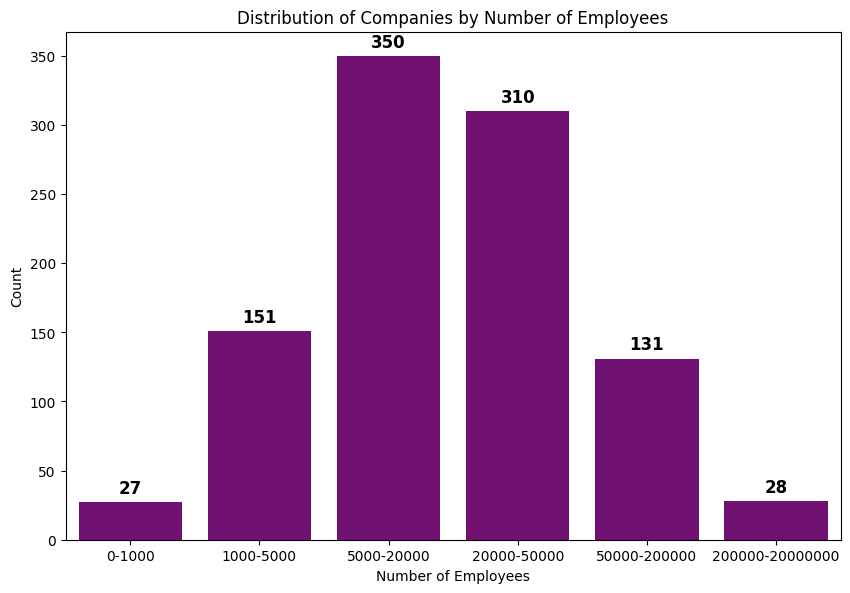

In [363]:
plt.figure(figsize=(10,6.6))
ax = sns.countplot(x='Company_Size', data=data_2024,color='purple')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Broj iznad bara
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Companies by Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Count')
plt.show()


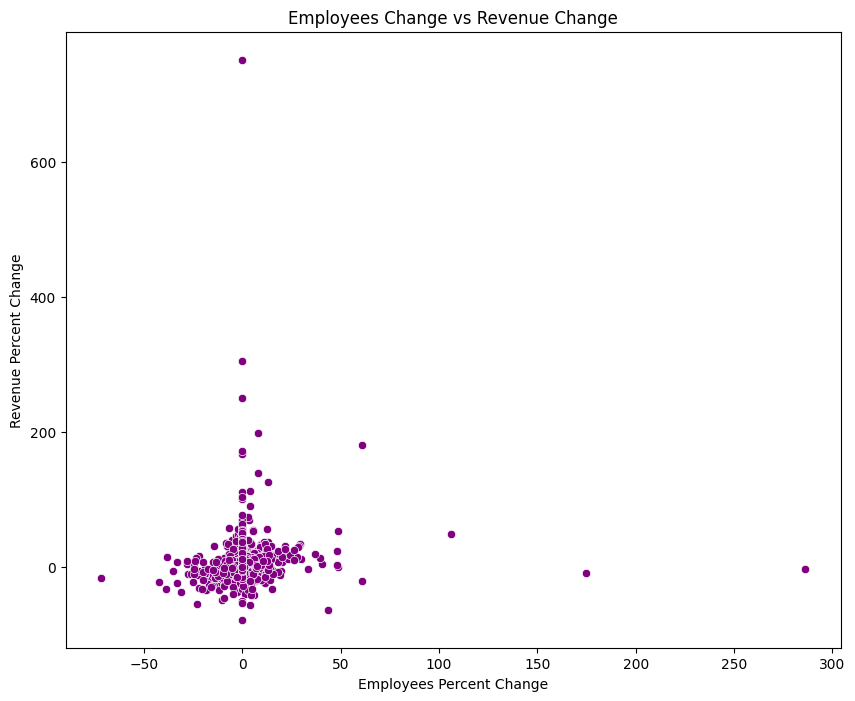

In [364]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='EmployeesPercentChange', y = 'RevenuePercentChange', data=data_2024, color='purple')

plt.title('Employees Change vs Revenue Change')
plt.xlabel('Employees Percent Change')
plt.ylabel('Revenue Percent Change')

plt.show()


In [365]:
data_2024 = data_2024.drop(['Company_Size'], axis=1)

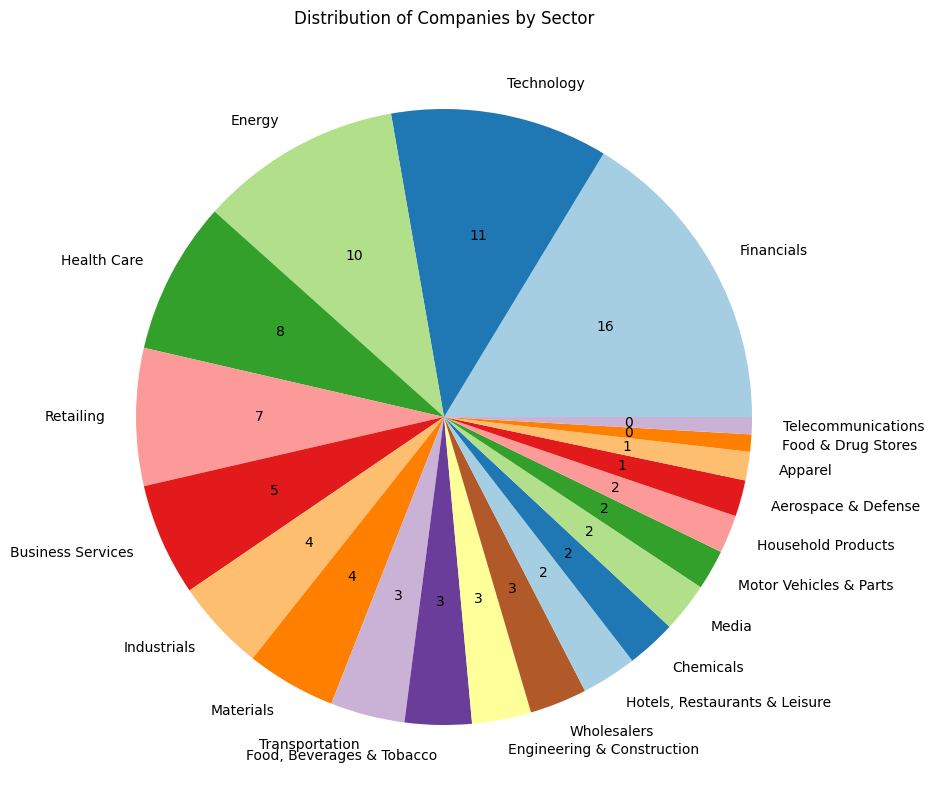

In [366]:
# prikazujemo sektore
sector_counts = data_2024_red['Sector'].value_counts()

plt.figure(figsize=(15, 10))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%d', colors=plt.cm.Paired.colors)
plt.title('Distribution of Companies by Sector')
plt.show()

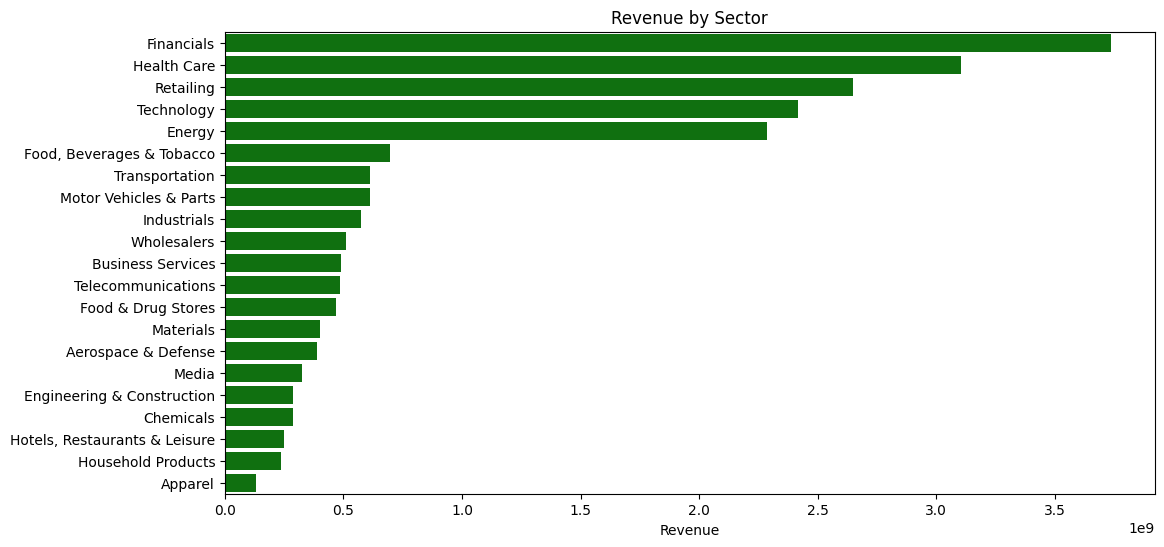

In [367]:
# prihodi po sektoru
revenue_sum = data_2024.groupby('Sector')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=revenue_sum, y=revenue_sum.index, color='green')

plt.title('Revenue by Sector')
plt.xlabel('Revenue')
plt.ylabel('')
 
plt.show()

In [368]:
data_2024_red['Industry'].nunique()

75

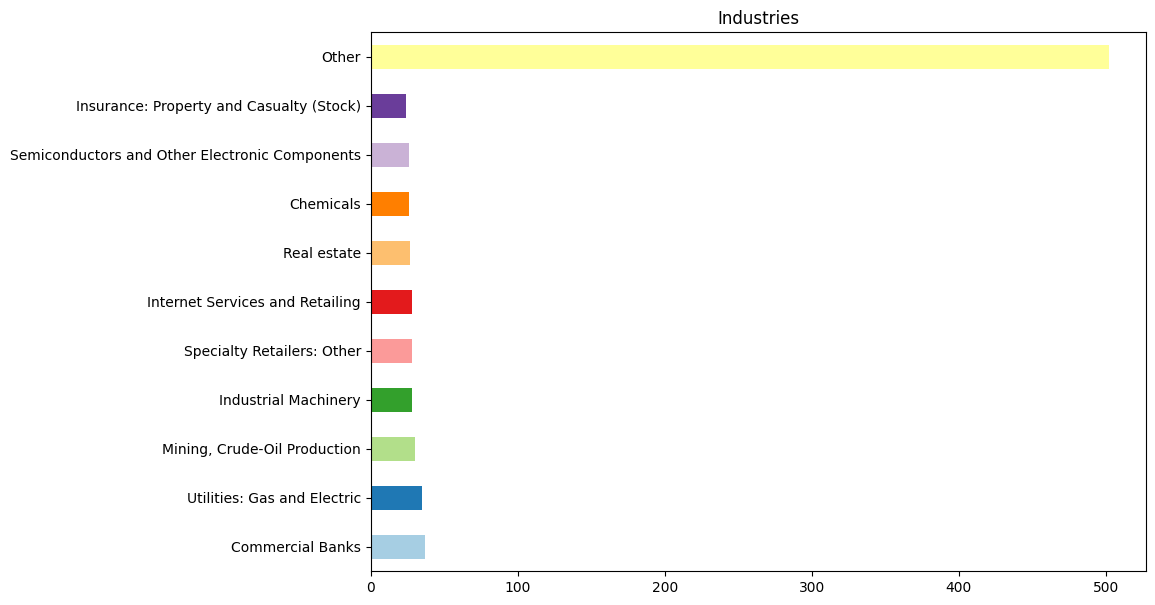

In [369]:
# prikazujemo industrije
industry_counts = data_2024['Industry'].value_counts()

top_industries = industry_counts.head(10)

other_industries = industry_counts.tail(industry_counts.size - 20).sum()
other_series = pd.Series({'Other': other_industries})


top_industries = pd.concat([top_industries, other_series])

plt.figure(figsize=(10,7))
top_industries.plot(kind='barh', color=plt.cm.Paired.colors)
plt.title('Industries')
plt.show()

In [370]:
data_2024.columns.astype('object')

Index(['Rank', 'Company', 'Sector', 'Industry', 'Profitable', 'Founder_is_CEO',
       'FemaleCEO', 'Growth_in_Jobs', 'Change_in_Rank', 'Global500',
       'Worlds_Most_Admired_Companies', 'Best_Companies_to_Work_For',
       'Number_of_employees', 'Revenue', 'RevenuePercentChange', 'Profit',
       'ProfitsPercentChange', 'Assets', 'HeadquartersCity',
       'HeadquartersState', 'CompanyType', 'MarketCap',
       'EmployeesPercentChange', 'Rank_Change'],
      dtype='object')

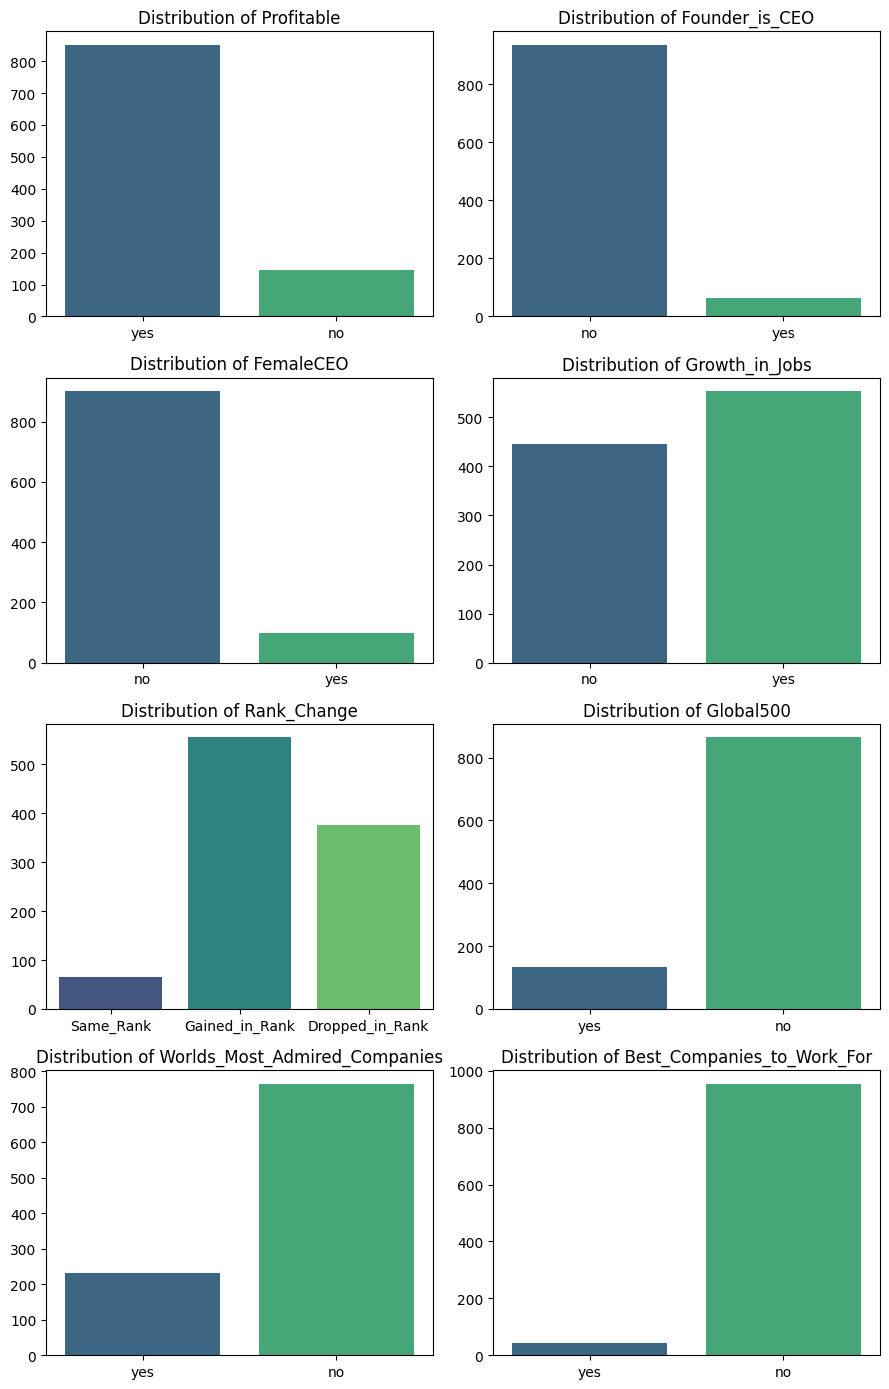

In [371]:
#prikaz kategoričkih varijabli

boolean_columns = [
    'Profitable',
    'Founder_is_CEO', 
    'FemaleCEO', 
    'Growth_in_Jobs',
    'Rank_Change', 
    'Global500', 
    'Worlds_Most_Admired_Companies', 
    'Best_Companies_to_Work_For'
]

fig, axes = plt.subplots(4, 2, figsize=(9,14))
axes = axes.flatten()

for i, column in enumerate(boolean_columns):
    sns.countplot(x=column, data=data_2024, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
#axes[-1].axis('off')

plt.tight_layout()
plt.show()


In [372]:
data_2024['HeadquartersState'].unique()

array(['Arkansas', 'Washington', 'California', 'Minnesota', 'Nebraska',
       'Rhode Island', 'Texas', 'Pennsylvania', 'New York', 'Ohio',
       'Connecticut', 'Michigan', 'North Carolina', 'Indiana', 'Missouri',
       'Georgia', 'District Of Columbia', 'Illinois', 'Virginia',
       'Kentucky', 'New Jersey', 'Tennessee', 'Idaho', 'Massachusetts',
       'Maryland', 'Florida', 'Oregon', 'Wisconsin', 'Colorado',
       'Arizona', 'Oklahoma', 'Nevada', 'Iowa', 'Louisiana', 'Delaware',
       'Kansas', 'Alabama', 'South Carolina', 'New Hampshire',
       'North Dakota', 'Utah', 'Puerto Rico', 'Vermont', 'Hawaii',
       'Maine', 'Mississippi', 'Montana'], dtype=object)

In [373]:
# heatmap za HeadquartersState
state_counts = data_2024_red.groupby('HeadquartersState')['Company'].count().reset_index()
state_counts.columns = ['State', 'CompanyCount']


state_mapping = {
    'Arkansas': 'AR', 'Washington': 'WA', 'California': 'CA',
    'Minnesota': 'MN', 'Nebraska': 'NE', 'Rhode Island': 'RI',
    'Texas': 'TX', 'Pennsylvania': 'PA', 'New York': 'NY',
    'Ohio': 'OH', 'Connecticut': 'CT', 'Michigan': 'MI',
    'North Carolina': 'NC', 'Indiana': 'IN', 'Missouri': 'MO',
    'Georgia': 'GA', 'District Of Columbia': 'DC', 'Illinois': 'IL',
    'Virginia': 'VA', 'Kentucky': 'KY', 'New Jersey': 'NJ',
    'Tennessee': 'TN', 'Idaho': 'ID', 'Massachusetts': 'MA',
    'Maryland': 'MD', 'Florida': 'FL', 'Oregon': 'OR',
    'Wisconsin': 'WI', 'Colorado': 'CO', 'Arizona': 'AZ',
    'Oklahoma': 'OK', 'Nevada': 'NV', 'Iowa': 'IA',
    'Louisiana': 'LA', 'Delaware': 'DE', 'Kansas': 'KS',
    'Alabama': 'AL', 'South Carolina': 'SC', 'New Hampshire': 'NH',
    'North Dakota': 'ND', 'Utah': 'UT', 'Puerto Rico': 'PR',
    'Vermont': 'VT', 'Hawaii': 'HI', 'Maine': 'ME',
    'Mississippi': 'MS', 'Montana': 'MT'
}

state_counts['StateCode'] = state_counts['State'].map(state_mapping)


fig = px.choropleth(
    state_counts,
    locations='StateCode',       
    locationmode='USA-states',   
    color='CompanyCount',        
    color_continuous_scale='Blues', 
    scope='usa',                 
    title='Distribution of Companies by State'
)

fig.update_layout(
    width=800,  
    height=600  
)

fig.show()


In [374]:
data_2024 = data_2024.drop(['Worlds_Most_Admired_Companies','Change_in_Rank'],axis=1)

In [375]:
data_2024['Year'] = 2024
fortune1000_2023['Year'] = 2023

In [376]:
fortune = pd.concat([fortune1000_2023, data_2024])

In [377]:
fortune.reset_index(drop=True, inplace=True)

In [378]:
fortune.isnull().sum()

Rank                          0
Company                       0
Sector                        0
Industry                      0
Profitable                    0
Founder_is_CEO                0
FemaleCEO                     0
Growth_in_Jobs                0
Global500                     0
Best_Companies_to_Work_For    0
Number_of_employees           0
Revenue                       0
RevenuePercentChange          0
Profit                        0
ProfitsPercentChange          0
Assets                        0
HeadquartersCity              0
HeadquartersState             0
CompanyType                   0
MarketCap                     0
Rank_Change                   0
EmployeesPercentChange        0
Year                          0
dtype: int64

In [379]:
fortune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rank                        1937 non-null   int64  
 1   Company                     1937 non-null   object 
 2   Sector                      1937 non-null   object 
 3   Industry                    1937 non-null   object 
 4   Profitable                  1937 non-null   object 
 5   Founder_is_CEO              1937 non-null   object 
 6   FemaleCEO                   1937 non-null   object 
 7   Growth_in_Jobs              1937 non-null   object 
 8   Global500                   1937 non-null   object 
 9   Best_Companies_to_Work_For  1937 non-null   object 
 10  Number_of_employees         1937 non-null   int64  
 11  Revenue                     1937 non-null   float64
 12  RevenuePercentChange        1937 non-null   float64
 13  Profit                      1937 

Korelacijska matrica

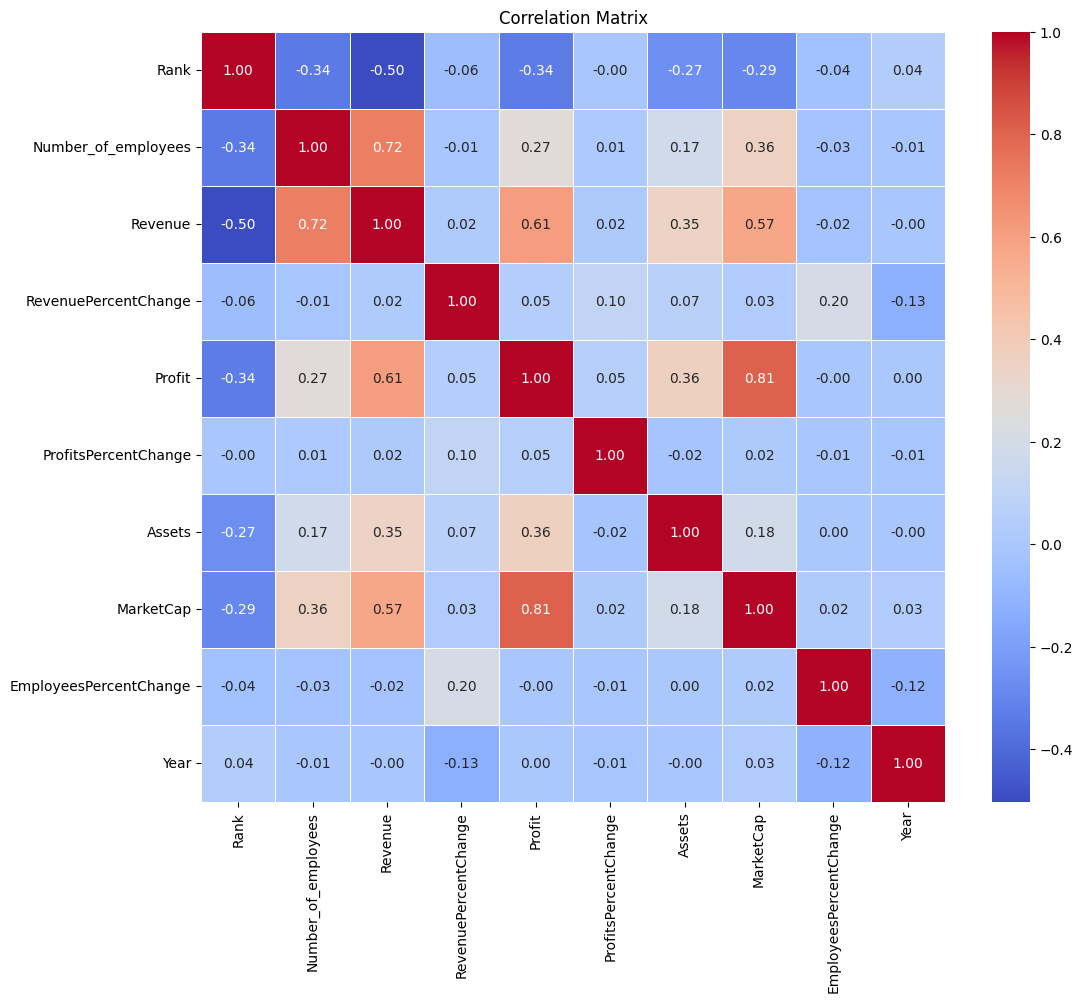

In [380]:
#kreiramo matricu korelacije
correlation_matrix = fortune.select_dtypes(include=['number']).corr();

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [381]:
fortune=fortune.drop(['Global500', 'Revenue', 'MarketCap'],axis=1)

*Enkodiranje kategoričkih varijabli*

In [382]:
columns_encode = []
for col in fortune.columns:
    if (fortune[col].dtype != 'float64' and fortune[col].dtype != 'int64'):
        columns_encode.append(col)

columns_encode

['Company',
 'Sector',
 'Industry',
 'Profitable',
 'Founder_is_CEO',
 'FemaleCEO',
 'Growth_in_Jobs',
 'Best_Companies_to_Work_For',
 'HeadquartersCity',
 'HeadquartersState',
 'CompanyType',
 'Rank_Change']

In [383]:
#instance Label Encodera
le = LabelEncoder()

for col in columns_encode:
    fortune[col] = le.fit_transform(fortune[col])


In [384]:
fortune.columns

Index(['Rank', 'Company', 'Sector', 'Industry', 'Profitable', 'Founder_is_CEO',
       'FemaleCEO', 'Growth_in_Jobs', 'Best_Companies_to_Work_For',
       'Number_of_employees', 'RevenuePercentChange', 'Profit',
       'ProfitsPercentChange', 'Assets', 'HeadquartersCity',
       'HeadquartersState', 'CompanyType', 'Rank_Change',
       'EmployeesPercentChange', 'Year'],
      dtype='object')

In [385]:
fortune.rename(columns={'Founder_is_CEO' : 'FounderCEO', 'Growth_in_Jobs': 'GrowthInJobs', 'Best_Companies_to_Work_For':'BestCompaniesToWorkFor','Number_of_employees':'NumberOfEmployees'},inplace=True)

In [386]:
fortune.isnull().sum()

Rank                      0
Company                   0
Sector                    0
Industry                  0
Profitable                0
FounderCEO                0
FemaleCEO                 0
GrowthInJobs              0
BestCompaniesToWorkFor    0
NumberOfEmployees         0
RevenuePercentChange      0
Profit                    0
ProfitsPercentChange      0
Assets                    0
HeadquartersCity          0
HeadquartersState         0
CompanyType               0
Rank_Change               0
EmployeesPercentChange    0
Year                      0
dtype: int64

In [387]:
fortune = fortune.drop(['Rank_Change', 'Company'], axis=1)

In [388]:
fortune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1937 entries, 0 to 1936
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    1937 non-null   int64  
 1   Sector                  1937 non-null   int32  
 2   Industry                1937 non-null   int32  
 3   Profitable              1937 non-null   int32  
 4   FounderCEO              1937 non-null   int32  
 5   FemaleCEO               1937 non-null   int32  
 6   GrowthInJobs            1937 non-null   int32  
 7   BestCompaniesToWorkFor  1937 non-null   int32  
 8   NumberOfEmployees       1937 non-null   int64  
 9   RevenuePercentChange    1937 non-null   float64
 10  Profit                  1937 non-null   float64
 11  ProfitsPercentChange    1937 non-null   float64
 12  Assets                  1937 non-null   float64
 13  HeadquartersCity        1937 non-null   int32  
 14  HeadquartersState       1937 non-null   

**Implementacija modela strojnog učenja**

Treniramo na skupu iz 2023., a predviđamo za 2024.

Decision Tree

Mean Absolute Error: 123.798
Root Mean Squared Error: 182.946
R²: 0.598


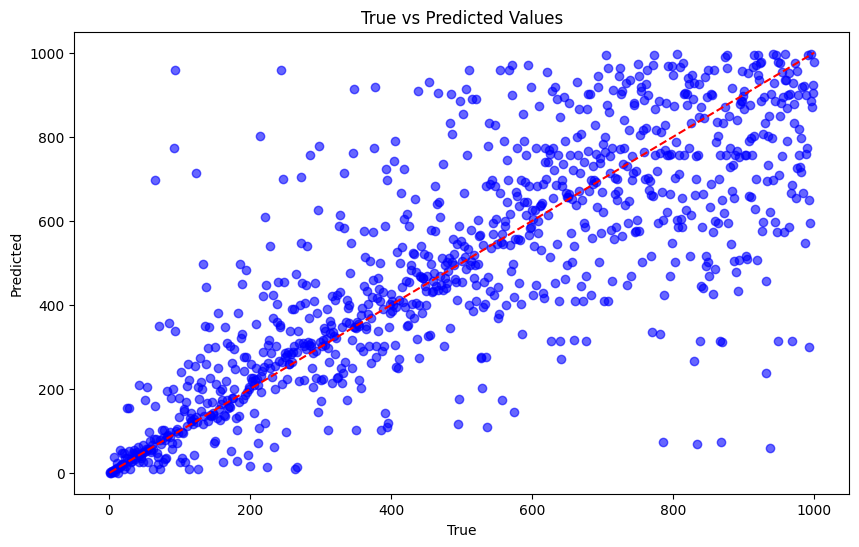

In [389]:
# Podjela skupa na temelju godine
X_train = fortune[fortune['Year'] == 2023].drop(columns=['Rank']) 
y_train = fortune[fortune['Year'] == 2023]['Rank']

X_test = fortune[fortune['Year'] == 2024].drop(columns=['Rank']) 
y_test = fortune[fortune['Year'] == 2024]['Rank']


# treniranje modela
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# predikcija
y_pred = model_dt.predict(X_test)
y_pred = np.round(y_pred).astype(int) #zaokruživanje previđanja na cijeli broj

# evaluacija
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')
print(f'R²: {r2:.3f}')

# vizualizacija
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  
plt.title('True vs Predicted Values')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

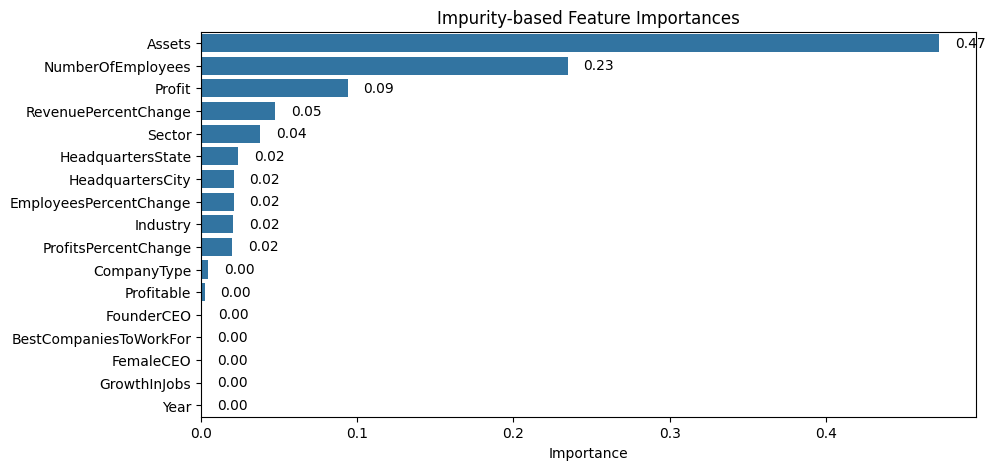

In [390]:
# važnost značajki
feature_importances = pd.Series(model_dt.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
for i, v in enumerate(feature_importances):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', ha='left')  

plt.title('Impurity-based Feature Importances')
plt.xlabel('Importance')
plt.ylabel('')
plt.show()

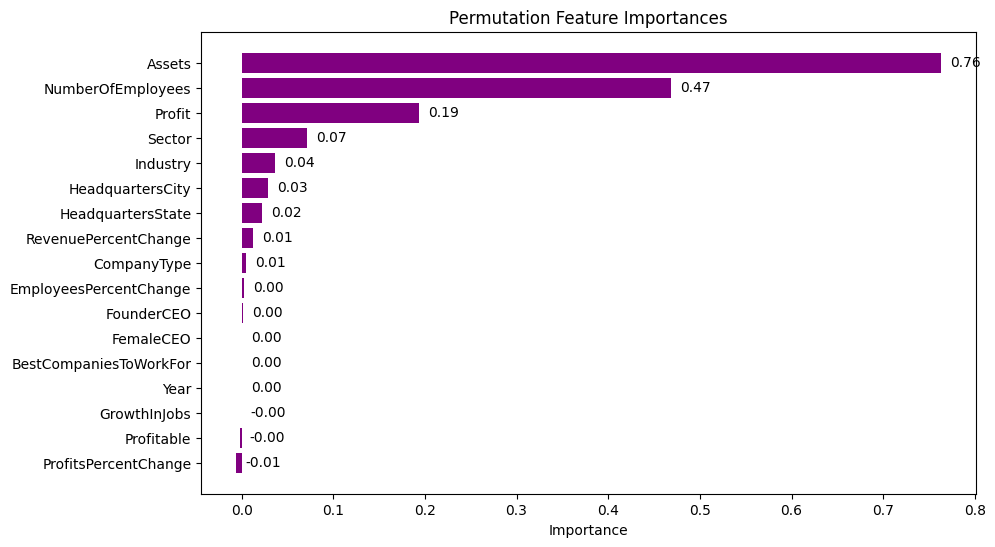

In [391]:
# permutacijska važnost
perm_importance = permutation_importance(model_dt, X_test, y_test, n_repeats=10, random_state=42, scoring='r2');

perm_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False);

plt.figure(figsize=(10, 6))
bars=plt.barh(perm_importances['Feature'], perm_importances['Importance'], color='purple')

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', color='black')
plt.gca().invert_yaxis()
plt.title('Permutation Feature Importances')
plt.xlabel('Importance')
plt.ylabel('')
plt.show()



Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters: {'min_samples_split': 4, 'min_samples_leaf': 10, 'max_features': None, 'max_depth': 21}
Mean Absolute Error: 111.835
Root Mean Squared Error: 12.279
R²: 0.727


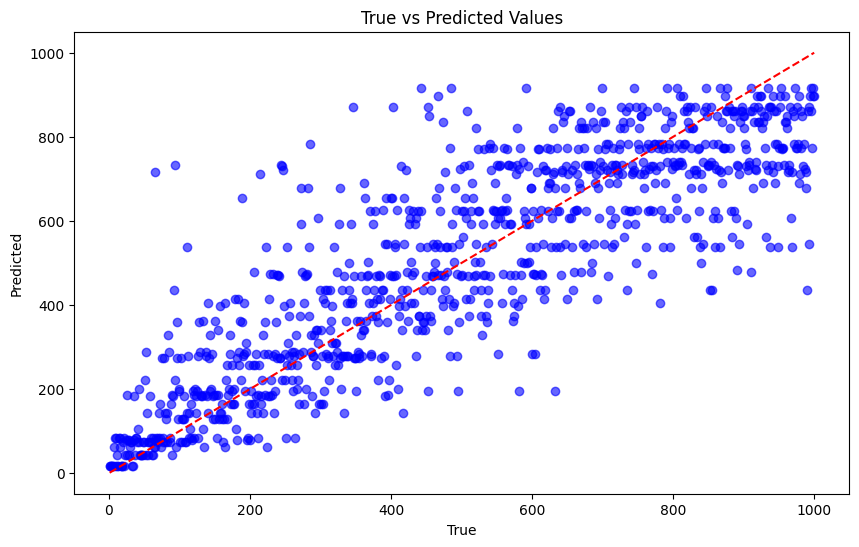

In [392]:

X_train = fortune[fortune['Year'] == 2023][['Assets', 'NumberOfEmployees','Profit', 'Sector', 'Industry', 'HeadquartersState', 'HeadquartersCity','RevenuePercentChange']]
y_train = fortune[fortune['Year'] == 2023]['Rank']

X_test = fortune[fortune['Year'] == 2024][['Assets', 'NumberOfEmployees','Profit', 'Sector', 'Industry', 'HeadquartersState', 'HeadquartersCity','RevenuePercentChange']]
y_test = fortune[fortune['Year'] == 2024]['Rank']



model_dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': range(2,51),
    'min_samples_split': range(2,11),
    'min_samples_leaf': range(1,11),
    'max_features': ['sqrt', 'log2', None],        
}


random_search = RandomizedSearchCV(
    estimator=model_dt,
    param_distributions=param_grid,
    n_iter=100,             
    scoring='r2', 
    cv=10,                
    verbose=2,             
    random_state=42,
    n_jobs=-1             
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred).astype(int) #zaokruživanje na cijeli broj

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')
print(f'R²: {r2:.3f}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('True vs Predicted Values')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

Random Forest Regressor

Mean Absolute Error: 94.393
Root Mean Squared Error: 130.849
R²: 0.794


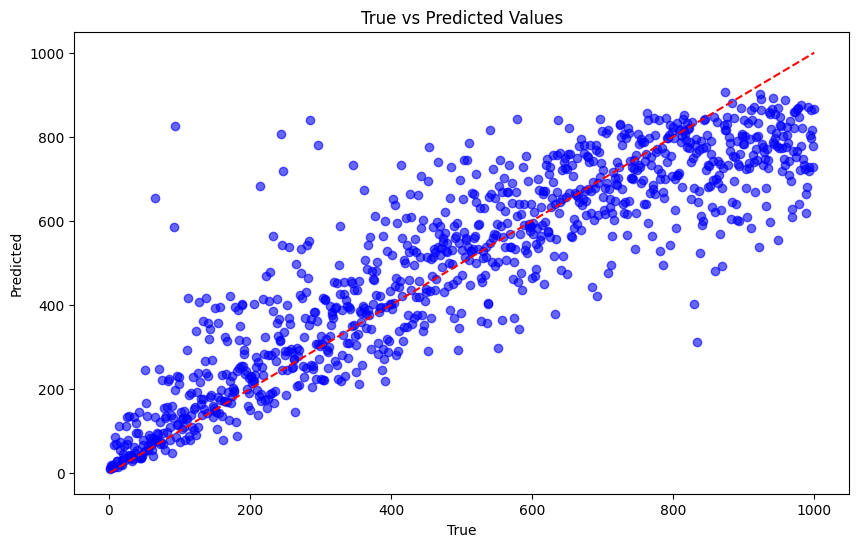

In [393]:
# Podjela skupa na temelju godine
X_train = fortune[fortune['Year'] == 2023].drop(columns=['Rank']) 
y_train = fortune[fortune['Year'] == 2023]['Rank']

X_test = fortune[fortune['Year'] == 2024].drop(columns=['Rank']) 
y_test = fortune[fortune['Year'] == 2024]['Rank']

# treniranje modela
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# predikcija
y_pred = model_rf.predict(X_test)
y_pred = np.round(y_pred).astype(int) #zaokruživanje na cijeli broj

# evaluacija
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')
print(f'R²: {r2:.3f}')

# vizualizacija
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  
plt.title('True vs Predicted Values')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

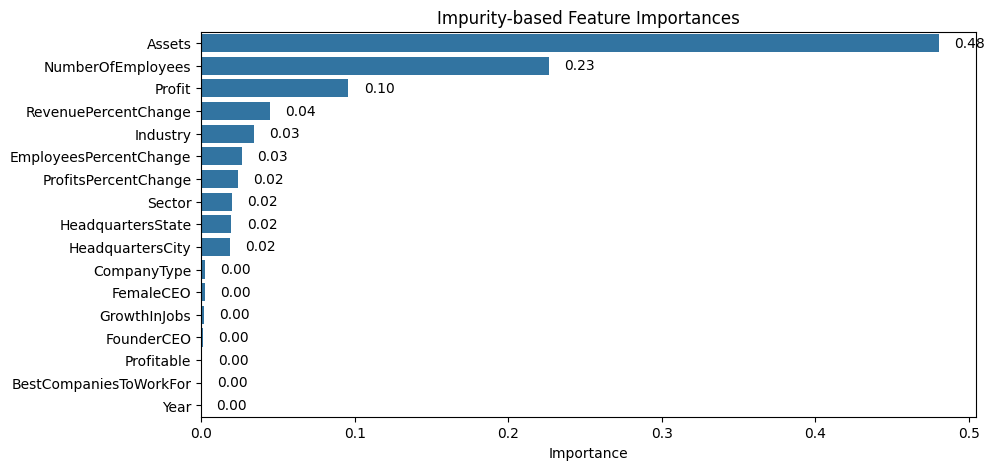

In [394]:
# važnost značajki
feature_importances = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# prikaz rezultata
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
for i, v in enumerate(feature_importances):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', ha='left')  

plt.title('Impurity-based Feature Importances')
plt.xlabel('Importance')
plt.ylabel('')
plt.show()

                   Feature  Importance
11                  Assets    0.619600
7        NumberOfEmployees    0.380209
9                   Profit    0.126631
1                 Industry    0.037912
0                   Sector    0.020079
13       HeadquartersState    0.009326
12        HeadquartersCity    0.008625
10    ProfitsPercentChange    0.003432
15  EmployeesPercentChange    0.001594
14             CompanyType    0.001454
4                FemaleCEO    0.001300
3               FounderCEO    0.000563
2               Profitable    0.000243
6   BestCompaniesToWorkFor    0.000155
16                    Year    0.000000
5             GrowthInJobs   -0.000157
8     RevenuePercentChange   -0.002551


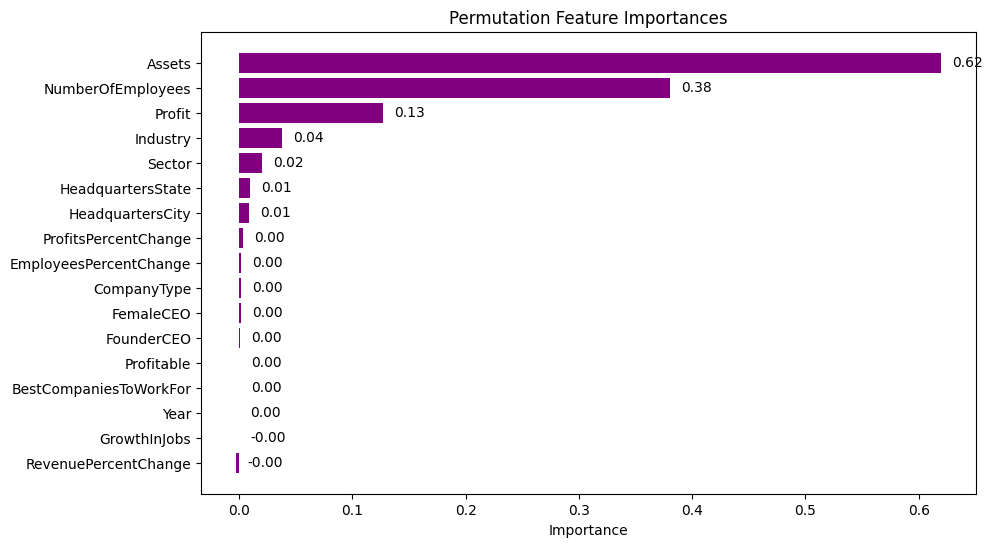

In [395]:

# Permutacijska važnost
perm_importance = permutation_importance(model_rf, X_test, y_test, n_repeats=10, scoring = 'r2',random_state=42)

# Prikaz važnosti značajki
perm_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_importances)

# Vizualizacija
plt.figure(figsize=(10, 6))
bars=plt.barh(perm_importances['Feature'], perm_importances['Importance'], color='purple')
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', color='black')
plt.gca().invert_yaxis()
plt.title('Permutation Feature Importances')
plt.xlabel('Importance')
plt.ylabel('')
plt.show()


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best hyperparameters from RandomizedSearchCV: {'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 36}
Mean Absolute Error: 94.772
Root Mean Squared Error: 11.393
R²: 0.797


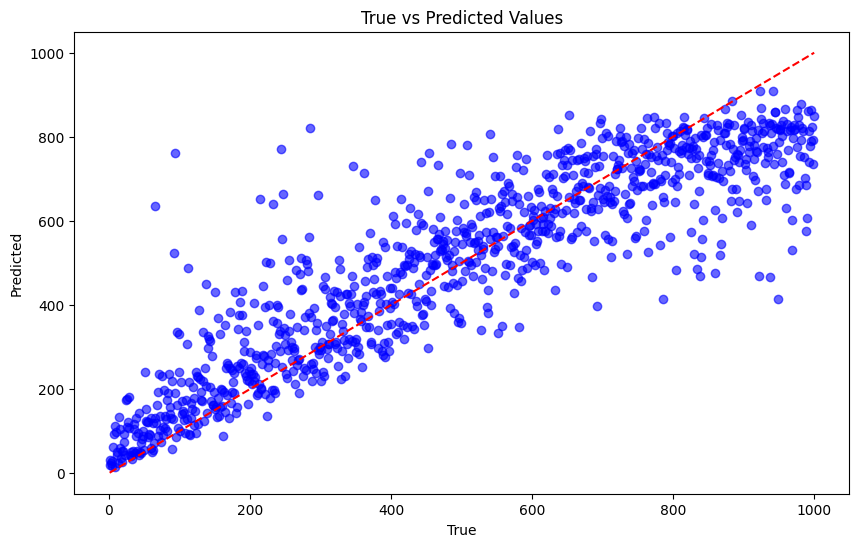

In [396]:
# Podjela skupa na temelju godine
X_train = fortune[fortune['Year'] == 2023][['Assets', 'NumberOfEmployees','Profit', 'Sector', 'Industry', 'HeadquartersState', 'HeadquartersCity','RevenuePercentChange']]
y_train = fortune[fortune['Year'] == 2023]['Rank']

X_test = fortune[fortune['Year'] == 2024][['Assets', 'NumberOfEmployees','Profit', 'Sector', 'Industry', 'HeadquartersState', 'HeadquartersCity','RevenuePercentChange']]
y_test = fortune[fortune['Year'] == 2024]['Rank']

model_rf = RandomForestRegressor(random_state=42)
param_dist = {
    'max_depth': range(2,51),
    'min_samples_split': range(2,11),
    'min_samples_leaf': range(1,11),
    'max_features': ['sqrt', 'log2', None],        
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_rf, 
                                   param_distributions=param_dist, 
                                   n_iter=100,  
                                   cv=10, 
                                   scoring='r2',
                                   n_jobs=-1,  
                                   verbose=2, 
                                   random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Display best hyperparameters found
print("Best hyperparameters from RandomizedSearchCV:", best_params)

# Predict using the best model
y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')
print(f'R²: {r2:.3f}')

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('True vs Predicted Values')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

XGBoost

Mean Absolute Error: 89.621
Root Mean Squared Error: 125.977
R²: 0.809


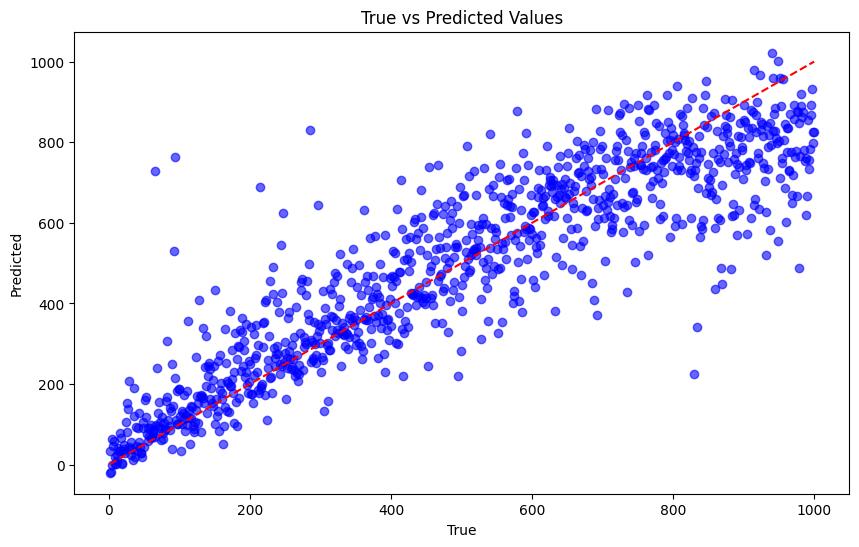

In [397]:

X_train = fortune[fortune['Year'] == 2023].drop(columns=['Rank']) 
y_train = fortune[fortune['Year'] == 2023]['Rank']

X_test = fortune[fortune['Year'] == 2024].drop(columns=['Rank']) 
y_test = fortune[fortune['Year'] == 2024]['Rank']


model_xgb = xgb.XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
y_pred = np.round(y_pred).astype(int)

mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')
print(f'R²: {r2:.3f}')

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  
plt.title('True vs Predicted Values')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

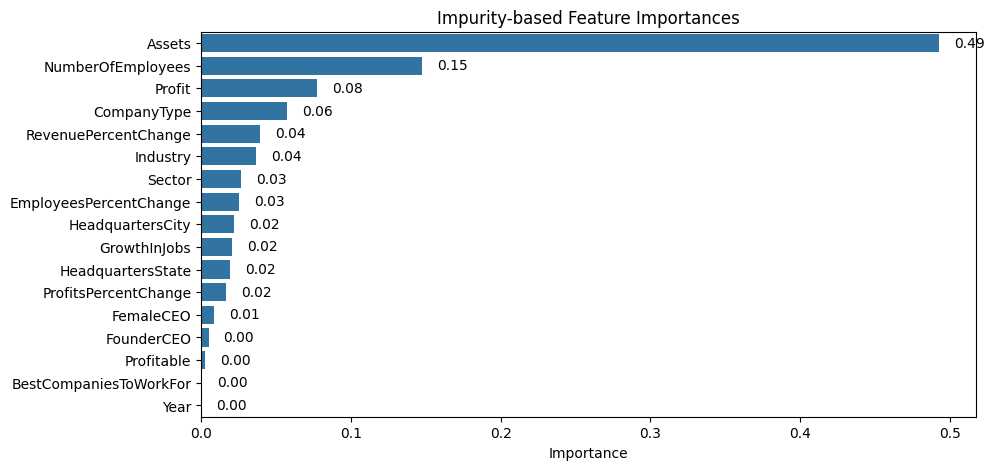

In [398]:
# važnost značajki
feature_importances = pd.Series(model_xgb.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# prikaz rezultata
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
for i, v in enumerate(feature_importances):
    plt.text(v + 0.01, i, f'{v:.2f}', va='center', ha='left')  

plt.title('Impurity-based Feature Importances')
plt.xlabel('Importance')
plt.ylabel('')
plt.show()

                   Feature  Importance
11                  Assets    0.680350
7        NumberOfEmployees    0.413864
9                   Profit    0.125367
1                 Industry    0.083232
0                   Sector    0.047184
12        HeadquartersCity    0.019973
13       HeadquartersState    0.015253
8     RevenuePercentChange    0.008574
15  EmployeesPercentChange    0.007374
10    ProfitsPercentChange    0.004472
14             CompanyType    0.003039
4                FemaleCEO    0.001155
2               Profitable    0.000101
16                    Year    0.000000
6   BestCompaniesToWorkFor   -0.000054
3               FounderCEO   -0.000169
5             GrowthInJobs   -0.000221


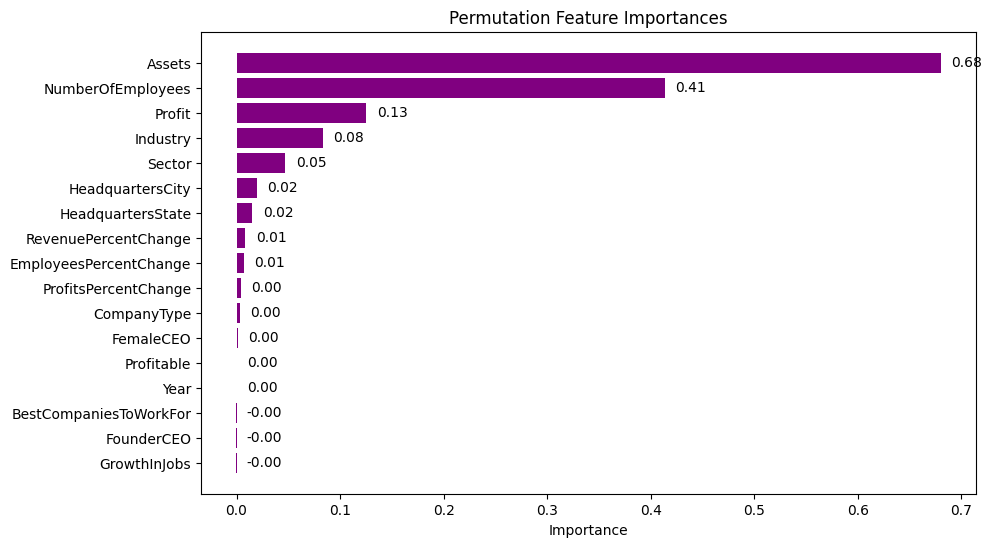

In [399]:
perm_importance = permutation_importance(model_xgb, X_test, y_test, n_repeats=10, random_state=42)

perm_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(perm_importances)

plt.figure(figsize=(10, 6))
bars=plt.barh(perm_importances['Feature'], perm_importances['Importance'], color='purple')
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', color='black')
plt.gca().invert_yaxis()
plt.title('Permutation Feature Importances')
plt.xlabel('Importance')
plt.ylabel('')
plt.show()


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters: {'learning_rate': 0.09866803872980476, 'max_depth': 4, 'n_estimators': 187, 'subsample': 0.8129299578571182}
Mean Absolute Error: 84.823
Root Mean Squared Error: 10.901
R²: 0.830


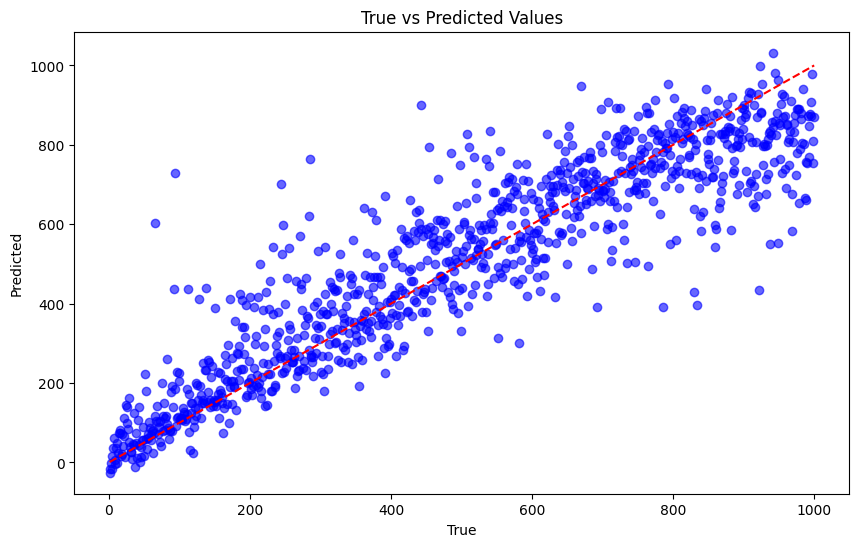

In [400]:

X_train = fortune[fortune['Year'] == 2023][['Assets', 'NumberOfEmployees','Profit', 'Sector', 'Industry', 'HeadquartersState', 'HeadquartersCity','RevenuePercentChange']]
y_train = fortune[fortune['Year'] == 2023]['Rank']

X_test = fortune[fortune['Year'] == 2024][['Assets', 'NumberOfEmployees','Profit', 'Sector', 'Industry', 'HeadquartersState', 'HeadquartersCity','RevenuePercentChange']]
y_test = fortune[fortune['Year'] == 2024]['Rank']

model_xgb = xgb.XGBRegressor(random_state=42)

param_grid = {
    'max_depth': range(1, 11),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators': range(50, 201)
}

random_search = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_grid,
    n_iter=100,  
    scoring='r2',
    cv=10, 
    verbose=2,
    random_state=42,
    n_jobs=-1  
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(root_mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')
print(f'R²: {r2:.3f}')


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('True vs Predicted Values')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()